## Problem Statement

In the realm of modern healthcare, there is a growing concern about respiratory conditions that impact the well-being of individuals and healthcare systems. Among these conditions, pneumonia represents a significant health challenge. The COVID-19 pandemic has further emphasized the importance of efficient and accurate diagnosis for respiratory illnesses, as it is a fast-growing disease with severe implications for human health.

Patients diagnosed with pneumonia can experience a wide range of symptoms, and early detection is crucial for effective treatment. The medical community has been actively working on developing vaccines and treatments for pneumonia, but there is still a pressing need to quickly and accurately identify cases. Pneumonia not only poses a health risk but can also strain the financial resources of individuals and healthcare providers.

Deep learning algorithms, including Convolutional Neural Networks (CNN), have demonstrated their potential to revolutionize medical image analysis. By applying CNNs, healthcare professionals can enhance their ability to classify X-ray images of the chest, distinguishing between patients with healthy lungs and those with pneumonia.

This technology can assist radiologists and healthcare providers in streamlining the diagnosis process, enabling the timely identification of pneumonia cases. By accurately categorizing X-ray images as "Normal" or "Pneumonia," healthcare institutions can expedite patient care, allocate resources more efficiently, and make well-informed medical decisions. This innovative approach represents a significant step forward in the quest to combat respiratory diseases, improve patient outcomes, and optimize the management of healthcare resources in the face of evolving health challenges.

### Objective

The aim of this project is to build a Convolutional Neural Network to differentiate between X-ray images of healthy individuals and those with viral pneumonia.

### Data Dictionary

- This dataset contains training set images of 3 classes which are converted into numpy arrays.

- The dataset comprises2 classes:
  - Viral Pneumonia: This is a viral fever which has similar characteristics like fever and cought that of Covid but is not covid.
  - Normal- A healthy Person with no symptoms of covid or fever.

## Importing necessary libraries

In [1]:
import os
import numpy as np                                                                               # Importing numpy for Matrix Operations
import pandas as pd                                                                              # Importing pandas to read CSV files
import matplotlib.pyplot as plt                                                                  # Importting matplotlib for Plotting and visualizing images
import math                                                                                      # Importing math module to perform mathematical operations
import cv2                                                                                       # Importing openCV for image processing
import seaborn as sns                                                                            # Importing seaborn to plot graphs


# Tensorflow modules
import tensorflow as tf
from tensorflow.keras.preprocessing.image import ImageDataGenerator                              # Importing the ImageDataGenerator for data augmentation
from tensorflow.keras.models import Sequential                                                   # Importing the sequential module to define a sequential model
from tensorflow.keras.layers import Dense,Dropout,Flatten,Conv2D,MaxPooling2D,BatchNormalization # Defining all the layers to build our CNN Model
from tensorflow.keras.optimizers import Adam,SGD                                                 # Importing the optimizers which can be used in our model
from sklearn import preprocessing                                                                # Importing the preprocessing module to preprocess the data
from sklearn.model_selection import train_test_split                                             # Importing train_test_split function to split the data into train and test
from sklearn.metrics import confusion_matrix                                                     # Importing confusion_matrix to plot the confusion matrix
from sklearn.preprocessing import LabelBinarizer
# Display images using OpenCV
from google.colab.patches import cv2_imshow                                                      # Importing cv2_imshow from google.patches to display images
from sklearn.model_selection import train_test_split
from tensorflow.keras import backend
from keras.callbacks import ReduceLROnPlateau
import random
# Ignore warnings
import warnings
warnings.filterwarnings('ignore')

In [2]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


## Loading the dataset

In [3]:
import zipfile
# Storing the path of the data file from the Google drive
path = '/content/drive/MyDrive/Pneumonia/ChestXRay2017.zip'

# The data is provided as a zip file so we need to extract the files from the zip file
with zipfile.ZipFile(path, 'r') as zip_ref:
    zip_ref.extractall()

In [4]:
picture_size = 124
folder_path = "/content/chest_xray/"

## Exploratory Data Analysis

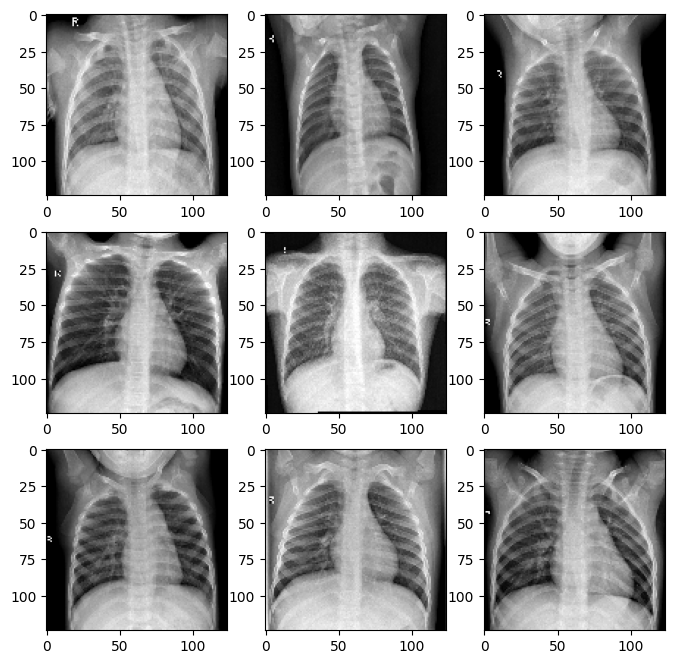

In [5]:
from tensorflow.keras.preprocessing.image import load_img, img_to_array
classes = 'NORMAL'

plt.figure(figsize= (8,8))
for i in range(1, 10, 1):
    plt.subplot(3, 3, i)

    img = load_img(folder_path + "train/" + classes + "/" +
                  os.listdir(folder_path + "train/" + classes)[i], target_size = (picture_size, picture_size))
    plt.imshow(img)

plt.show()

**Observations**

* **The normal X-ray images exhibit high-quality, well-exposed visuals with minimal artifacts or noise.**

These X-ray images categorized as "normal" in our analysis stand out for their remarkable quality and clarity. The level of exposure in these visuals is well-optimized, providing a clear and detailed view of the anatomical structures. Additionally, the absence of artifacts or noise, such as unwanted spots or distortions, ensures that the images faithfully represent the patient's internal anatomy. This high-quality imaging is essential for accurate diagnosis and assessment, as it minimizes the risk of misinterpretation and ensures that the X-rays are reliable for medical evaluation.

* **Anatomical structures, including bones and organs, are clearly defined, showing expected symmetry and positioning.**

The X-ray images under consideration portray anatomical structures, such as bones and organs, in a highly distinct and recognizable manner. These structures are presented with the anticipated symmetry and positioning, aligning with the standard anatomical relationships seen in healthy individuals. The clarity and precise definition of these structures are pivotal for diagnostic purposes, as they enable medical professionals to confidently identify and evaluate the patient's internal anatomy. This conformity to expected anatomical norms within the images is indicative of the absence of any evident anomalies or abnormalities, reinforcing the categorization of these X-rays as "normal."

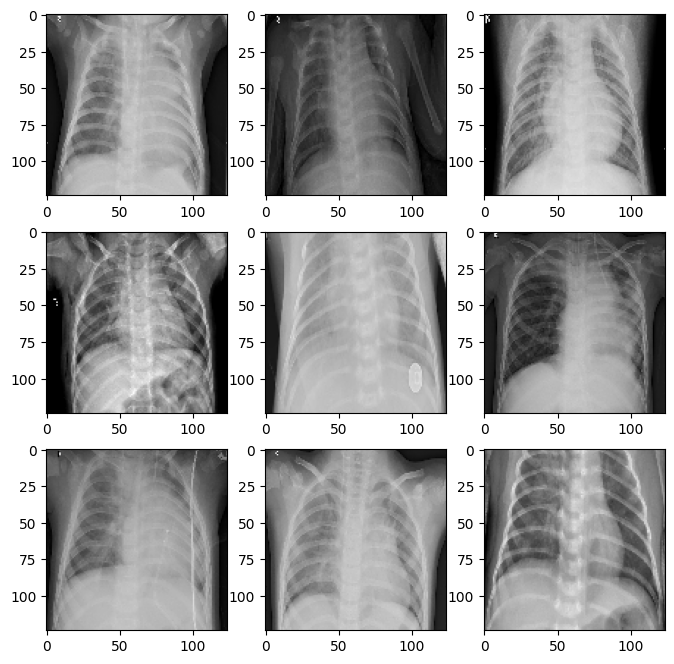

In [6]:
classes = 'PNEUMONIA'

plt.figure(figsize= (8,8))
for i in range(1, 10, 1):
    plt.subplot(3, 3, i)

    img = load_img(folder_path + "train/" + classes + "/" +
                  os.listdir(folder_path + "train/" + classes)[i], target_size = (picture_size, picture_size))
    plt.imshow(img)

plt.show()

**Observations**

* **These X-ray images show abnormal patterns, like cloudy or hazy areas, which could indicate the presence of pneumonia.**

In these X-ray images, we observe deviations from the expected normal appearance. Specifically, we can identify irregular, cloudy, or hazy patterns within the lung regions. These patterns are concerning as they may signal the possible presence of pneumonia. Pneumonia is a lung infection characterized by inflammation and the accumulation of fluid or pus in the air sacs, leading to these cloudy and hazy areas. Recognizing these abnormal patterns in X-rays is crucial for early diagnosis and prompt medical intervention.

* **We can see areas of inflammation and opacity in the lungs, suggesting that pneumonia might be present.**

Within the lung structures captured in these X-ray images, we can clearly identify regions displaying signs of inflammation and opacity. These findings strongly suggest the potential presence of pneumonia. Inflammation occurs as the body's response to an infection, and in the context of pneumonia, it typically results in increased opacity in the affected areas. The opacity represents a reduction in the lung's ability to transmit light, often caused by the presence of inflammatory exudates or other substances within the air sacs. This combination of inflammation and opacity is a key indicator for clinicians when diagnosing pneumonia cases based on X-ray imagery.*

In [7]:
# Getting count of images in each folder within our training path
num_normal = len(os.listdir(folder_path + "train/NORMAL"))
print("Number of images in the class 'Normal':   ", num_normal)

num_pneumonia  = len(os.listdir(folder_path + "train/PNEUMONIA"))
print("Number of images in the class 'Pneumonia':   ", num_pneumonia)

Number of images in the class 'Normal':    1349
Number of images in the class 'Pneumonia':    3884


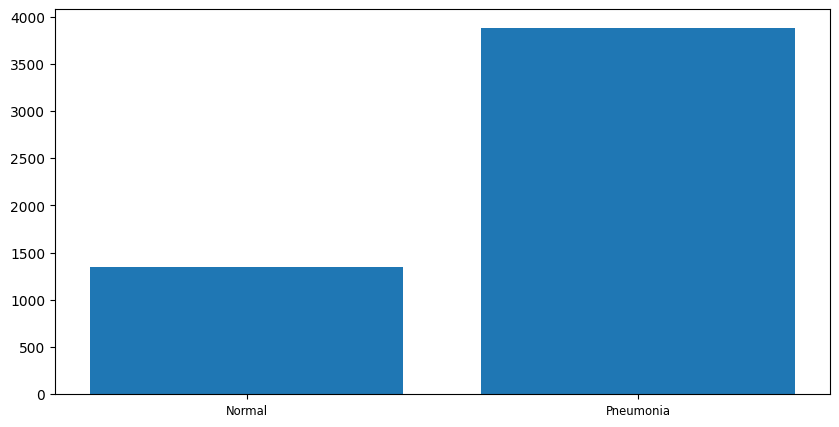

In [8]:
# Plotting histogram
plt.figure(figsize = (10, 5))

data = {'Normal': num_normal, 'Pneumonia': num_pneumonia}

df = pd.Series(data)

plt.bar(range(len(df)), df.values, align = 'center')

plt.xticks(range(len(df)), df.index.values, size = 'small')

plt.show()

**Observations**

* In the context of the plot presented above, we can readily discern that the dataset exhibits a significant class imbalance. Specifically, within our dataset, there are approximately 3884 images representing cases of pneumonia, while there are only 1349 images corresponding to the normal, non-pneumonia class. This striking disparity between the two classes suggests that the data is heavily skewed, with one class significantly outnumbering the other. In machine learning, such a substantial class imbalance can pose challenges during model training and evaluation, as it may lead the model to favor the majority class, potentially resulting in suboptimal performance. To address this issue and ensure the model's ability to learn from both classes effectively, it is advisable to employ techniques for balancing the dataset before proceeding with model development.

## Data Preprocessing

In [26]:
from tensorflow.keras.preprocessing.image import ImageDataGenerator

# Define the directory paths for the entire dataset
data_directory = '/content/chest_xray/train'

# Define data generators for train, validation, and test data
datagen = ImageDataGenerator(
    rescale=1.0/255.0,
    validation_split=0.2  # 20% of the data will be used for validation
)

# Set batch size and target image size
batch_size = 32
image_size = (150, 150)

# Load and preprocess data with validation split
train_data_generator = datagen.flow_from_directory(
    data_directory,
    target_size=image_size,
    batch_size=batch_size,
    class_mode='binary',
    subset='training'  # Use 'training' for the training data
)
# Extract true labels for the training data
num_samples = len(train_data_generator)
batch_index = 0
true_labels = []

while batch_index < num_samples:
    data, labels = train_data_generator[batch_index]
    true_labels.extend(labels)
    batch_index += 1

true_labels_train = np.array(true_labels)


validation_data_generator = datagen.flow_from_directory(
    data_directory,
    target_size=image_size,
    batch_size=batch_size,
    class_mode='binary',
    subset='validation'  # Use 'validation' for the validation data
)
# Extract true labels for the training data
num_samples = len(validation_data_generator)
batch_index = 0
true_labels = []

while batch_index < num_samples:
    data, labels = validation_data_generator[batch_index]
    true_labels.extend(labels)
    batch_index += 1

true_labels_val = np.array(true_labels)


# Define the directory path for test data
test_directory = '/content/chest_xray/test'

# Define a data generator for test data
test_datagen = ImageDataGenerator(rescale=1.0/255.0)

test_data_generator = test_datagen.flow_from_directory(
    test_directory,
    target_size=image_size,
    batch_size=batch_size,
    class_mode='binary'  # You can set this to 'categorical' if you have multiple classes
)

# Extract true labels for the training data
num_samples = len(test_data_generator)
batch_index = 0
true_labels = []

while batch_index < num_samples:
    data, labels = test_data_generator[batch_index]
    true_labels.extend(labels)
    batch_index += 1

true_labels_test = np.array(true_labels)

Found 4187 images belonging to 2 classes.
Found 1045 images belonging to 2 classes.
Found 624 images belonging to 2 classes.


* We have successfully loaded the train, validation, and test data from the respective directories. Now, let's try converting the original images to different forms and see if that helps in identifying any patterns.

### HSV images

**What is HSV?**

HSV stands for Hue, Saturation, and Value (or Brightness). It's a color space that represents colors in a way that is often more intuitive and perceptually meaningful than the more common RGB (Red, Green, Blue) color space. HSV is particularly useful for various computer vision tasks, image processing, and computer graphics. Here's an overview of each component in the HSV color space:

- Hue (H): The hue component represents the type of color, such as red, green, blue, yellow, etc. It is measured in degrees, typically ranging from 0 to 360, where 0 and 360 both correspond to red. Hue provides information about the dominant wavelength of light that gives the color its distinct identity.

- Saturation (S): Saturation refers to the purity or vividness of the color. A high saturation value means the color is more pure, while a low saturation value results in a more washed-out or grayish appearance. Saturation is usually represented as a percentage, ranging from 0% (completely unsaturated or grayscale) to 100% (fully saturated).

- Value (V): Value represents the brightness or intensity of the color. A higher value indicates a brighter color, while a lower value results in a darker color. Value is typically represented on a scale from 0 to 100 or 0 to 1.

The HSV color space is often preferred over RGB for certain computer vision tasks and image processing operations because it separates color information (hue and saturation) from brightness information (value). This separation makes it easier to manipulate and analyze color properties independently. Some common use cases for the HSV color space in computer vision include:

  - Object Tracking: HSV can be used to identify and track objects based on their color, making it more robust to lighting changes.
  - Color-Based Image Segmentation: HSV is used for segmenting regions of interest in images based on specific colors.
  - Image Enhancement: Adjusting the saturation and value components can enhance or manipulate the colors in an image.
  - Color Recognition: HSV is used for recognizing and classifying objects or regions based on their colors.
  - Image Thresholding: HSV thresholding is commonly used to separate objects of interest from the background in color images.
  
HSV is a powerful tool for working with color information in computer vision and is especially useful when you need to focus on the perceptual attributes of color rather than the raw pixel values.

**Why it is used?**

The HSV color space is used in computer vision and image processing for various reasons, as it offers several advantages over other color representations like RGB. Here are some key reasons for using the HSV color space:

- Intuitive Color Description: HSV provides a more intuitive way to describe and manipulate colors. Hue represents the perceived color, saturation controls the vividness or purity of the color, and value represents the brightness. This separation makes it easier to work with color attributes individually.

- Color Invariance: HSV is less sensitive to changes in lighting conditions compared to RGB. It can be particularly useful when working with images captured under varying lighting conditions. This invariance to lighting changes can improve the performance of color-based computer vision algorithms.

- Color-Based Object Detection: When you need to identify or track objects in an image based on their color, the HSV color space is a better choice. It simplifies the task of specifying the desired color or color range for object detection.

- Segmentation: HSV is often used for segmenting images into different regions or objects based on their colors. This is valuable for tasks like image analysis, object recognition, and medical image processing.

- Image Enhancement: You can use HSV to enhance or manipulate the color in an image. Adjusting the saturation or value allows you to make colors more vibrant, desaturate them, or adjust the overall brightness.

- Thresholding: HSV thresholding simplifies the process of isolating objects or regions of interest in an image based on their color characteristics. This can be helpful for tasks like background removal or feature extraction.

Color Recognition: When you need to recognize specific colors in images, HSV is a valuable tool. It simplifies color-based recognition and classification tasks.

In [10]:
import numpy as np
import tensorflow as tf

def convert_to_hsv_batch(image_batch):
    # Convert the batch of images to the HSV color space
    hsv_batch = [tf.image.rgb_to_hsv(image) for image in image_batch]
    return tf.convert_to_tensor(hsv_batch)

# Convert training data to HSV
train_data_generator_hsv = ImageDataGenerator(
    rescale=1.0/255.0,
    validation_split=0.2
).flow_from_directory(
    data_directory,
    target_size=image_size,
    batch_size=batch_size,
    class_mode='binary',
    subset='training'
)

train_data_generator_hsv_converted = (
    (convert_to_hsv_batch(images), labels)
    for images, labels in train_data_generator_hsv
)

# Convert validation data to HSV
validation_data_generator_hsv = ImageDataGenerator(
    rescale=1.0/255.0,
    validation_split=0.2
).flow_from_directory(
    data_directory,
    target_size=image_size,
    batch_size=batch_size,
    class_mode='binary',
    subset='validation'
)

validation_data_generator_hsv_converted = (
    (convert_to_hsv_batch(images), labels)
    for images, labels in validation_data_generator_hsv
)

# Convert test data to HSV
test_data_generator_hsv = ImageDataGenerator(rescale=1.0/255.0).flow_from_directory(
    test_directory,
    target_size=image_size,
    batch_size=batch_size,
    class_mode='binary'
)

test_data_generator_hsv_converted = (
    (convert_to_hsv_batch(images), labels)
    for images, labels in test_data_generator_hsv
)

Found 4187 images belonging to 2 classes.
Found 1045 images belonging to 2 classes.
Found 624 images belonging to 2 classes.


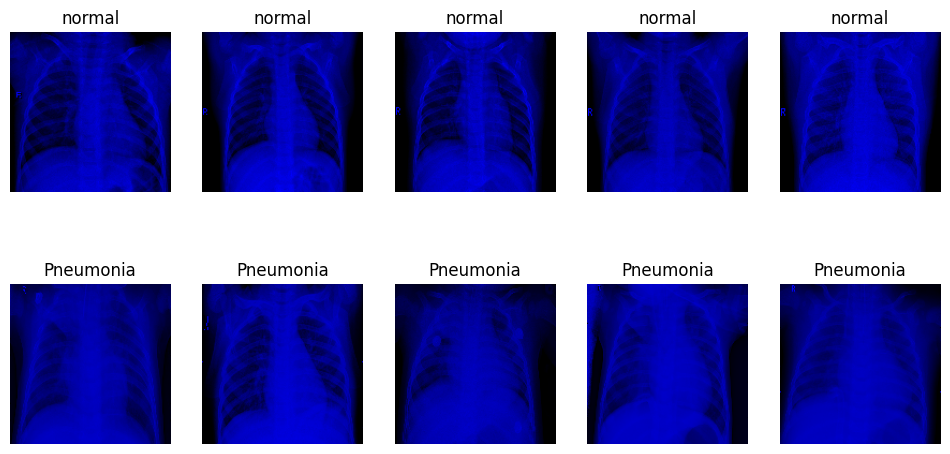

In [11]:
import matplotlib.pyplot as plt

# Define a function to plot HSV images from a batch
def plot_hsv_images_from_batch(batch, class_names, num_images=5):
    for class_idx, class_name in enumerate(class_names):
        # Get a batch of images and labels
        images, labels = next(batch)

        # Find the indices of images belonging to the current class
        class_indices = np.where(labels == class_idx)[0]

        # Randomly select 'num_images' images from the current class
        selected_indices = np.random.choice(class_indices, num_images, replace=False)

        for i, idx in enumerate(selected_indices):
            plt.subplot(len(class_names), num_images, class_idx * num_images + i + 1)
            plt.imshow(images[idx])
            plt.title(class_name)
            plt.axis('off')

# Define class names
class_names = ['normal', 'Pneumonia']

# Plot HSV images from the training data
plt.figure(figsize=(12, 6))
plot_hsv_images_from_batch(train_data_generator_hsv_converted, class_names)  # Use the converted data
plt.show()

**Observations**

* In our visual analysis, we can discern that a specific image processing step has been undertaken, wherein the original images have been transformed into the HSV (Hue, Saturation, and Value) color space. This conversion represents a fundamental shift in how colors are represented and can reveal new insights and relationships within the images. It's a pivotal preprocessing step that may impact how we perceive and analyze the images, potentially exposing patterns that were not evident in the original color representation.

* Despite the conversion to the HSV format, the visual representation of the images seems to remain consistent with the original data. There are no discernible additional details, features, or patterns that have been unveiled as a result of this transformation. It suggests that the HSV format may not provide a significant advantage in terms of information gain or enhanced distinguishability in the context of the specific dataset and analytical goals.

* Based on the observations and the apparent lack of added information following the HSV conversion, it leads us to the conclusion that this particular transformation may not be particularly useful in the context of our model-building objectives. It's an essential realization, as it allows us to make informed decisions about which preprocessing steps to retain and which to discard, ultimately guiding us toward more effective feature engineering and model development strategies.

### Gaussian Blur

**What is Gaussian Blur?**

Gaussian blur is a type of image-blurring filter that is widely used in various image processing and computer vision tasks. It's named after the Gaussian function, which is a mathematical function that describes a symmetric, bell-shaped curve. The Gaussian blur operation is used to reduce the noise in an image and to smooth out the fine details while preserving the overall structure and edges.

Here's how Gaussian blur works:

Convolution Operation: Gaussian blur is typically applied as a convolution operation on an image. A convolution operation involves passing a filter (in this case, a Gaussian kernel) over the image to calculate the weighted average of the pixel values within a local neighborhood. The result of this operation is a new image in which each pixel is a weighted average of its neighboring pixels.

- Kernel Shape: The Gaussian kernel used for the convolution is a two-dimensional matrix that has a central pixel with the highest weight (usually 1) and gradually decreasing weights as you move away from the center. The shape of the kernel follows a Gaussian distribution, which is why it's called a Gaussian kernel.

- Blurring Effect: When the Gaussian kernel is convolved with the image, it effectively blurs the image. The degree of blurring is determined by the standard deviation (σ) of the Gaussian distribution. A higher σ results in a wider and smoother blur, while a lower σ results in a narrower and more subtle blur.

Gaussian blur is commonly used for various purposes, including:

  - Noise Reduction: It helps reduce random noise in images, making them cleaner and easier to analyze.

  - Preprocessing: In computer vision tasks, Gaussian blur is often applied as a preprocessing step to improve the performance of edge detection, object recognition, and other algorithms.

Gaussian blur is just one of many image-blurring techniques, and its effectiveness depends on the specific application and the characteristics of the images being processed.

**Why it is used?**

Gaussian blur is used for several important purposes in image processing and computer vision:

- Noise Reduction: Images often contain unwanted random variations in pixel values, known as noise. This noise can be caused by factors such as sensor imperfections, compression artifacts, or environmental factors. Applying Gaussian blur can help smooth out these random variations, making the image cleaner and easier to work with.

- Edge Detection: In many image processing tasks, the first step is to detect edges or boundaries within the image. By blurring the image with Gaussian blur, small-scale details and noise are removed, which can enhance the detection of larger-scale edges and features.

- Feature Extraction: In computer vision applications, feature extraction is critical for identifying objects or patterns within images. Gaussian blur is often used as a preprocessing step to simplify the image and reduce the amount of data to process, making feature extraction more efficient.

In [12]:
import cv2
import matplotlib.pyplot as plt

# Define a function to apply Gaussian blur to an image
def apply_gaussian_blur(image):
    # Apply Gaussian blur to the image
    blurred_image = cv2.GaussianBlur(image, (5, 5), 0)

    return blurred_image

# Add the Gaussian blur function to the datagen
datagen = ImageDataGenerator(
    rescale=1.0/255.0,
    validation_split=0.2,
    preprocessing_function=apply_gaussian_blur  # Add the Gaussian blur function
)

# Load and preprocess data with validation split
train_data_generator_gaussian = datagen.flow_from_directory(
    data_directory,
    target_size=image_size,
    batch_size=batch_size,
    class_mode='binary',
    subset='training'  # Use 'training' for the training data
)

validation_data_generator_gaussian = datagen.flow_from_directory(
    data_directory,
    target_size=image_size,
    batch_size=batch_size,
    class_mode='binary',
    subset='validation'  # Use 'validation' for the validation data
)

# Define the directory path for test data
#test_directory = '/content/chest_xray/test'

# Define a data generator for test data
test_datagen = ImageDataGenerator(rescale=1.0/255.0)

# Apply Gaussian blur to test data
test_datagen.preprocessing_function = apply_gaussian_blur  # Add the Gaussian blur function
test_data_generator_gaussian = test_datagen.flow_from_directory(
    test_directory,
    target_size=image_size,
    batch_size=batch_size,
    class_mode='binary'  # You can set this to 'categorical' if you have multiple classes
)

Found 4187 images belonging to 2 classes.
Found 1045 images belonging to 2 classes.
Found 624 images belonging to 2 classes.


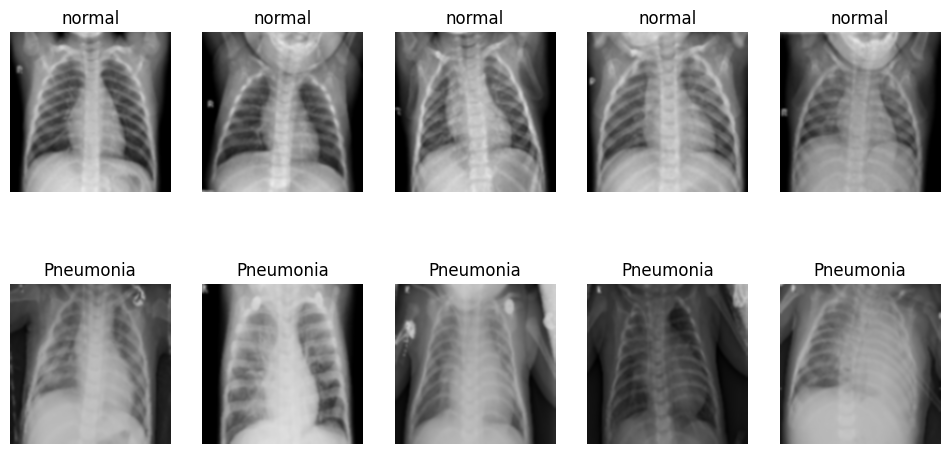

In [13]:
import matplotlib.pyplot as plt

# Define a function to plot Gaussian-blurred images from a batch
def plot_gaussian_blurred_images_from_batch(batch, class_names, num_images=5):
    for class_idx, class_name in enumerate(class_names):
        # Get a batch of images and labels
        images, labels = next(batch)

        # Find the indices of images belonging to the current class
        class_indices = np.where(labels == class_idx)[0]

        # Randomly select 'num_images' images from the current class
        selected_indices = np.random.choice(class_indices, num_images, replace=False)

        for i, idx in enumerate(selected_indices):
            plt.subplot(len(class_names), num_images, class_idx * num_images + i + 1)
            plt.imshow(images[idx])
            plt.title(class_name)
            plt.axis('off')

# Define class names
class_names = ['normal', 'Pneumonia']

# Plot Gaussian-blurred images from the training data
plt.figure(figsize=(12, 6))
plot_gaussian_blurred_images_from_batch(train_data_generator_gaussian, class_names)
plt.show()

**Observations**

* By analyzing the plot presented above, it becomes apparent that applying Gaussian blur to the original images leads to a notable reduction in the detectable patterns within the images. The Gaussian blur transformation is designed to smooth and simplify the visual information, which may result in a less detailed and more uniform appearance. Consequently, this blurring process appears to diminish the presence of distinct patterns or fine-grained features that might have been more pronounced in the unaltered images.

* Despite the observed reduction in image patterns, it's important to recognize that the application of Gaussian blur confers a notable advantage in terms of computational efficiency. By smoothing and simplifying the images, the computational load required for subsequent analysis or modeling is significantly diminished. This means that tasks like feature extraction, classification, or other data-driven operations become less resource-intensive and more streamlined. Therefore, while the conversion to Gaussian blur may lead to a loss of fine-grained patterns, it can contribute to the overall efficiency and speed of the data processing and analysis pipeline.

#### Comparision of Original images Vs Blurred images

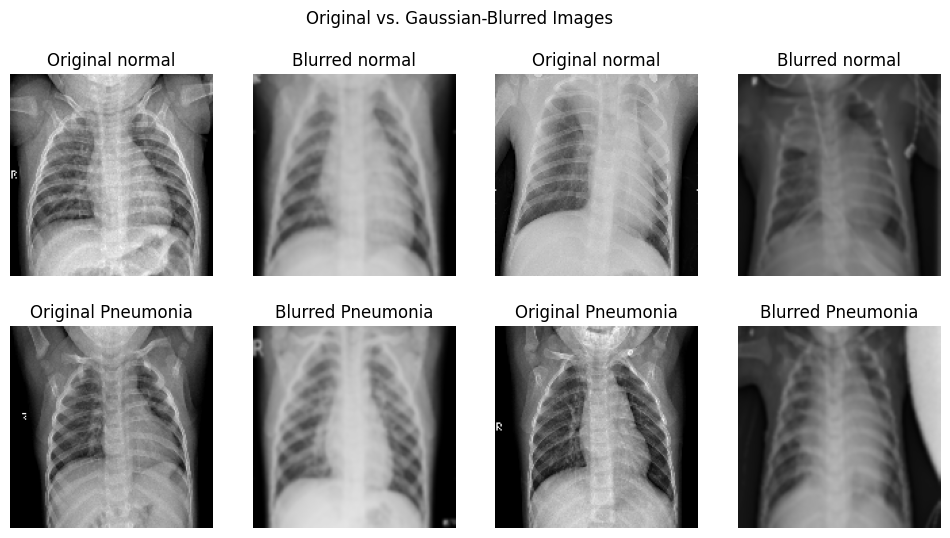

In [14]:
import matplotlib.pyplot as plt

# Define a function to plot original and Gaussian-blurred images side by side
def plot_original_vs_blurred_images(original_generator, blurred_generator, class_names, num_images=2):
    for class_idx, class_name in enumerate(class_names):
        # Get a batch of original images and labels
        original_images, labels = next(original_generator)

        # Find the indices of images belonging to the current class
        class_indices = np.where(labels == class_idx)[0]

        # Randomly select 'num_images' images from the current class
        num_images = min(num_images, len(class_indices))  # Ensure num_images <= available samples
        selected_indices = np.random.choice(class_indices, num_images, replace=False)

        for i, idx in enumerate(selected_indices):
            # Original image
            plt.subplot(len(class_names), 2 * num_images, class_idx * 2 * num_images + i * 2 + 1)
            plt.imshow(original_images[i])
            plt.title('Original ' + class_name)
            plt.axis('off')

            # Synchronize and get the same indices from the blurred generator
            for j in range(idx):
                next(blurred_generator)  # Advance to the corresponding index

            # Get the blurred image
            blurred_images, _ = next(blurred_generator)

            # Blurred image
            plt.subplot(len(class_names), 2 * num_images, class_idx * 2 * num_images + i * 2 + 2)
            plt.imshow(blurred_images[0])
            plt.title('Blurred ' + class_name)
            plt.axis('off')

# Define class names
class_names = ['normal', 'Pneumonia']

# Plot original vs. Gaussian-blurred images from the training data
plt.figure(figsize=(12, 6))
plot_original_vs_blurred_images(train_data_generator, train_data_generator_gaussian, class_names)
plt.suptitle('Original vs. Gaussian-Blurred Images')
plt.show()

**Observations**

* By examining the plot above, we gain insight into the contrast between the original, unaltered images and the images that have undergone a Gaussian blur transformation. This comparison allows us to visually appreciate the effects of the blurring process, revealing how the fine details and sharp edges in the original images have been softened and diffused in the blurred versions.

* An important observation to make is that even after applying the Gaussian blur, the essential information and key features within the images remain intact. The blurring process may reduce fine-grained details and enhance certain smoothness, yet it retains the fundamental content and structure. This preservation of essential information signifies that Gaussian blur, in this context, maintains the core visual characteristics and patterns, which can be advantageous in cases where the elimination of minor noise or unimportant details is desirable while preserving the integrity of the primary content.

So, let's build the models using Gaussina blurred images.

## Model Building

### Basic CNN Model

In [15]:
from tensorflow.keras import backend
# Clearing backend
backend.clear_session()
# Fixing the seed for random number generators
np.random.seed(42)
random.seed(42)
tf.random.set_seed(42)

In [16]:
  # Initializing a Sequential Model
  model1 = Sequential()

  # Adding the first Convolutional block
  model1.add(Conv2D(filters = 64, kernel_size = 2, padding = "same", activation = "relu", input_shape = (150, 150, 3)))
  model1.add(MaxPooling2D(pool_size = 2))
  model1.add(Dropout(0.2))

  # Adding the second Convolutional block
  model1.add(Conv2D(filters=32, kernel_size = 2, padding = "same", activation = "relu"))
  model1.add(MaxPooling2D(pool_size = 2))
  model1.add(Dropout(0.2))

  # Adding the third Convolutional block
  model1.add(Conv2D(filters=32, kernel_size = 2, padding = "same", activation = "relu"))
  model1.add(MaxPooling2D(pool_size = 2))
  model1.add(Dropout(0.2))

  # Adding the Flatten layer
  model1.add(Flatten())

  # Adding the first Dense layer
  model1.add(Dense(512,activation = "relu"))
  model1.add(Dropout(0.4))

  # Adding the final layer
  model1.add(Dense(1,activation = "sigmoid"))

  model1.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 150, 150, 64)      832       
                                                                 
 max_pooling2d (MaxPooling2  (None, 75, 75, 64)        0         
 D)                                                              
                                                                 
 dropout (Dropout)           (None, 75, 75, 64)        0         
                                                                 
 conv2d_1 (Conv2D)           (None, 75, 75, 32)        8224      
                                                                 
 max_pooling2d_1 (MaxPoolin  (None, 37, 37, 32)        0         
 g2D)                                                            
                                                                 
 dropout_1 (Dropout)         (None, 37, 37, 32)        0

**Let us understand the parameters in each layer:**

* Conv2D Layer (conv2d):

  - Output Shape: (None, 150, 150, 64)
  - Number of parameters = 832
  - Calculation: (3x3x3 (filter size) x 64 (number of filters)) + 64 (bias terms)

* MaxPooling2D Layer (max_pooling2d):

  - Output Shape: (None, 75, 75, 64)
  - No parameters in this layer, so the number of parameters is 0.

* Dropout Layer (dropout):

  - Output Shape: (None, 75, 75, 64)
  - No parameters in this layer, so the number of parameters is 0.

* Conv2D Layer (conv2d_1):

  - Output Shape: (None, 75, 75, 32)
  - Number of parameters = 8,224
  - Calculation: (3x3x64 (filter size) x 32 (number of filters)) + 32 (bias terms)

* MaxPooling2D Layer (max_pooling2d_1):

  - Output Shape: (None, 37, 37, 32)
  - No parameters in this layer, so the number of parameters is 0.

* Dropout Layer (dropout_1):

  - Output Shape: (None, 37, 37, 32)
  - No parameters in this layer, so the number of parameters is 0.

* Conv2D Layer (conv2d_2):

  - Output Shape: (None, 37, 37, 32)
  Number of parameters = 4,128
  - Calculation: (3x3x32 (filter size) x 32 (number of filters)) + 32 (bias terms)

* MaxPooling2D Layer (max_pooling2d_2):

  - Output Shape: (None, 18, 18, 32)
  - No parameters in this layer, so the number of parameters is 0.

* Dropout Layer (dropout_2):

  - Output Shape: (None, 18, 18, 32)
  - No parameters in this layer, so the number of parameters is 0.

* Flatten Layer (flatten):

  - Output Shape: (None, 10,368)
  - No parameters in this layer, so the number of parameters is 0.

* Dense Layer (dense):

  - Output Shape: (None, 512)
  - Number of parameters = 5,308,928
  - Calculation: (10,368 (input neurons) x 512 (output neurons)) + 512 (bias terms)

* Dropout Layer (dropout_3):

  - Output Shape: (None, 512)
  - No parameters in this layer, so the number of parameters is 0.

* Dense Layer (dense_1):

  - Output Shape: (None, 1)
  - Number of parameters = 513
  - Calculation: (512 (input neurons) x 1 (output neurons)) + 1 (bias term)

The total number of trainable parameters in the model is the sum of the parameters in all layers:
Total params = 832 + 0 + 0 + 8,224 + 0 + 0 + 4,128 + 0 + 0 + 0 + 5,308,928 + 0 + 513 = 5,322,625.

So, the model has a total of 5,322,625 trainable parameters.

In [17]:
from keras.callbacks import ModelCheckpoint, EarlyStopping, ReduceLROnPlateau

checkpoint = ModelCheckpoint("./model1.h5", monitor='val_acc', verbose=1, save_best_only=True, mode='max')

early_stopping = EarlyStopping(monitor = 'val_loss',
                          min_delta = 0,
                          patience = 3,
                          verbose = 1,
                          restore_best_weights = True
                          )

reduce_learningrate = ReduceLROnPlateau(monitor = 'val_loss',
                              factor = 0.2,
                              patience = 3,
                              verbose = 1,
                              min_delta = 0.0001)

callbacks_list = [early_stopping, checkpoint, reduce_learningrate]

epochs = 20

In [18]:
model1.compile(loss = 'binary_crossentropy',
              optimizer = Adam(learning_rate = 0.001),
              metrics = ['accuracy'])

In [19]:
history = model1.fit(train_data_generator,
                                steps_per_epoch = train_data_generator.n//train_data_generator.batch_size,
                                epochs = epochs,
                                validation_data = validation_data_generator_gaussian,
                                validation_steps = validation_data_generator_gaussian.n//validation_data_generator_gaussian.batch_size,
                                callbacks = callbacks_list
                                )

Epoch 1/20
130/130 [==============================] - ETA: 0s - loss: 0.3335 - accuracy: 0.8452

130/130 [==============================] - 76s 478ms/step - loss: 0.3335 - accuracy: 0.8452 - val_loss: 0.3028 - val_accuracy: 0.8799 - lr: 0.0010
Epoch 2/20
130/130 [==============================] - ETA: 0s - loss: 0.1266 - accuracy: 0.9507

130/130 [==============================] - 51s 391ms/step - loss: 0.1266 - accuracy: 0.9507 - val_loss: 0.2098 - val_accuracy: 0.9336 - lr: 0.0010
Epoch 3/20
130/130 [==============================] - ETA: 0s - loss: 0.0910 - accuracy: 0.9653

130/130 [==============================] - 51s 392ms/step - loss: 0.0910 - accuracy: 0.9653 - val_loss: 0.1926 - val_accuracy: 0.9365 - lr: 0.0010
Epoch 4/20
130/130 [==============================] - ETA: 0s - loss: 0.0803 - accuracy: 0.9692

130/130 [==============================] - 59s 453ms/step - loss: 0.0803 - accuracy: 0.9692 - val_loss: 0.2050 - val_accuracy: 0.9434 - lr: 0.0010
Epoch 5/20
130/130 [==============================] - ETA: 0s - loss: 0.0756 - accuracy: 0.9721

130/130 [==============================] - 50s 389ms/step - loss: 0.0756 - accuracy: 0.9721 - val_loss: 0.1670 - val_accuracy: 0.9453 - lr: 0.0010
Epoch 6/20
130/130 [==============================] - ETA: 0s - loss: 0.0698 - accuracy: 0.9721

130/130 [==============================] - 51s 391ms/step - loss: 0.0698 - accuracy: 0.9721 - val_loss: 0.1733 - val_accuracy: 0.9473 - lr: 0.0010
Epoch 7/20
130/130 [==============================] - ETA: 0s - loss: 0.0563 - accuracy: 0.9798

130/130 [==============================] - 49s 377ms/step - loss: 0.0563 - accuracy: 0.9798 - val_loss: 0.2296 - val_accuracy: 0.9023 - lr: 0.0010
Epoch 8/20
130/130 [==============================] - ETA: 0s - loss: 0.0498 - accuracy: 0.9805Restoring model weights from the end of the best epoch: 5.



Epoch 8: ReduceLROnPlateau reducing learning rate to 0.00020000000949949026.
130/130 [==============================] - 49s 374ms/step - loss: 0.0498 - accuracy: 0.9805 - val_loss: 0.2185 - val_accuracy: 0.9004 - lr: 0.0010
Epoch 8: early stopping


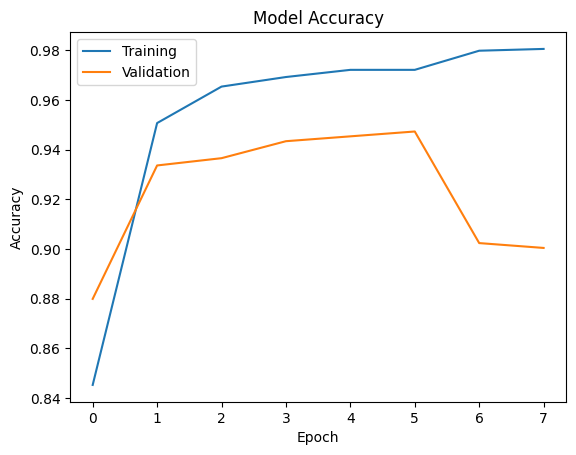

In [20]:
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('Model Accuracy')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.legend(['Training', 'Validation'], loc='upper left')
plt.show()

* From the above plot we can observe that the model is performing nicely on both train and validation

In [28]:
# Get true labels
true_labels = []
batch_size = train_data_generator.batch_size
num_batches = len(train_data_generator)
for i in range(num_batches):
    images, labels = next(train_data_generator)
    true_labels.extend(labels)

true_labels = np.array(true_labels)

131/131 [==============================] - 39s 298ms/step
Best threshold: 0.49822995


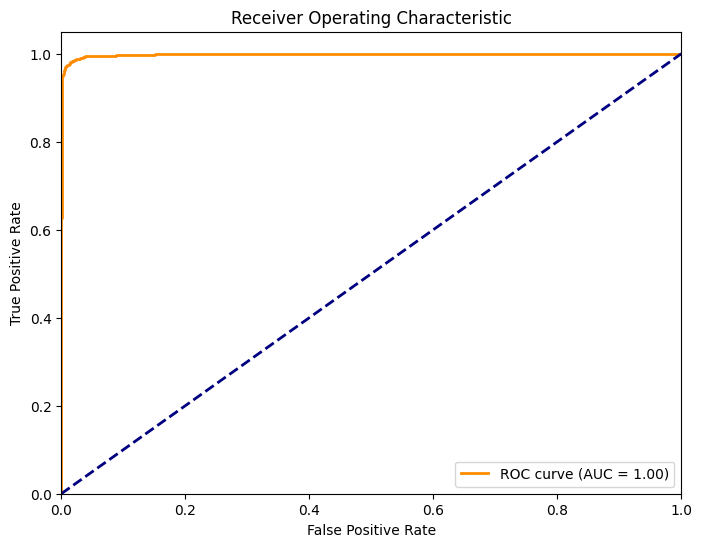

In [29]:
from sklearn.metrics import roc_curve, auc
import numpy as np
import matplotlib.pyplot as plt

# Assuming you have a model named 'model1' and true labels in 'true_labels'

# Get predicted probabilities
predictions = model1.predict(train_data_generator)

# Calculate the ROC curve
fpr, tpr, thresholds = roc_curve(true_labels, predictions)

# Calculate the area under the ROC curve (AUC)
roc_auc = auc(fpr, tpr)

# Find the threshold that maximizes the Youden's J statistic
Youden = tpr - fpr
best_threshold = thresholds[np.argmax(Youden)]

# Plot the ROC curve
plt.figure(figsize=(8, 6))
plt.plot(fpr, tpr, color='darkorange', lw=2, label='ROC curve (AUC = %0.2f)' % roc_auc)
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic')
plt.legend(loc="lower right")

# Print the best threshold
print("Best threshold:", best_threshold)

plt.show()

In [30]:
from sklearn.metrics import confusion_matrix
import numpy as np

# Assuming you have a model named 'model1' and a data generator 'train_data_generator_gaussian'

# Get true labels
true_labels = []
batch_size = train_data_generator.batch_size
num_batches = len(train_data_generator)
for i in range(num_batches):
    images, labels = next(train_data_generator)
    true_labels.extend(labels)

true_labels = np.array(true_labels)

# Convert predictions to binary classes
predicted_classes = (predictions > 0.90).astype(int)

# Compute the confusion matrix
confusion = confusion_matrix(true_labels, predicted_classes)

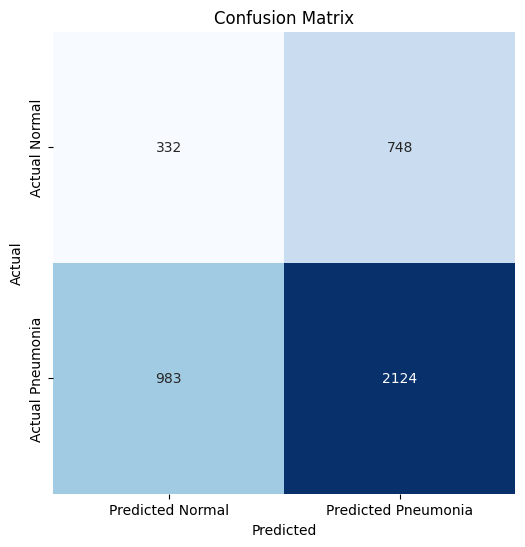

In [31]:
# Create a heatmap of the confusion matrix
plt.figure(figsize=(8, 6))
sns.heatmap(confusion, annot=True, fmt='d', cmap='Blues', cbar=False, square=True,
            xticklabels=['Predicted Normal', 'Predicted Pneumonia'],
            yticklabels=['Actual Normal', 'Actual Pneumonia'])
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix')
plt.show()

**Observations**

* This observation highlights a notable concern in our model's performance. Despite its capabilities, the model has made predictions that classify images as pneumonia when they are, in fact, normal. This type of misclassification can have significant implications in a medical context, potentially leading to false diagnoses or incorrect recommendations. Understanding and addressing these instances is crucial to enhancing the model's accuracy and reliability.

* The model's misclassifications underscore the need for refinement. There exists an evident opportunity for enhancing the model's predictive accuracy. This improvement can be achieved through various means, such as further fine-tuning the model's architecture, optimizing training parameters, and potentially incorporating additional data or features. The model's performance can be enhanced to better distinguish between normal and pneumonia cases, minimizing the occurrence of false positives and ensuring more reliable outcomes in medical diagnosis and decision-making.

In [32]:
from sklearn.metrics import classification_report

# Assuming you have true labels and predicted classes
# true_labels: True class labels
# predicted_classes: Predicted class labels

# Generate the classification report
report = classification_report(true_labels, predicted_classes, target_names=['Normal', 'Pheumonia'])

# Print and plot the classification report as a table
print("Classification Report:\n", report)

# You can also plot the report as a table using a library like tabulate
from tabulate import tabulate

# Split the report into lines and remove empty lines
lines = report.split('\n')
lines = [line for line in lines if line.strip() != '']

# Display the report as a table
print(tabulate([line.split() for line in lines], headers='keys', tablefmt='pretty'))

Classification Report:
               precision    recall  f1-score   support

      Normal       0.25      0.31      0.28      1080
   Pheumonia       0.74      0.68      0.71      3107

    accuracy                           0.59      4187
   macro avg       0.50      0.50      0.49      4187
weighted avg       0.61      0.59      0.60      4187

+-----------+--------+----------+---------+
|     0     |   1    |    2     |    3    |
+-----------+--------+----------+---------+
| precision | recall | f1-score | support |
|  Normal   |  0.25  |   0.31   |  0.28   |
| Pheumonia |  0.74  |   0.68   |  0.71   |
| accuracy  |  0.59  |   4187   |         |
|   macro   |  avg   |   0.50   |  0.50   |
| weighted  |  avg   |   0.61   |  0.59   |
+-----------+--------+----------+---------+


**Observations**

* Precision of the model - 0.50
* Recall of the model - 0.50
* F1-score of the model - 0.50

* Let's try transfer learning models

### Transfer Learning Model - 1

In [42]:
from tensorflow.keras.preprocessing.image import ImageDataGenerator
import cv2
import matplotlib.pyplot as plt

# Define a function to apply Gaussian blur to an image


batch_size = 32
image_size = (150, 150)
num_epochs = 10


# Create an ImageDataGenerator with data augmentation
datagen = ImageDataGenerator(
    rescale=1.0/255.0,
    validation_split=0.2,
    rotation_range=40,  # Random rotation up to 40 degrees
    width_shift_range=0.2,  # Random horizontal shift
    height_shift_range=0.2,  # Random vertical shift
    shear_range=0.2,  # Shear transformation
    zoom_range=0.2,  # Random zoom
    horizontal_flip=True,  # Random horizontal flip
    fill_mode='nearest'  # Fill mode for pixel values outside the image
)

# Load and preprocess data with validation split and data augmentation
train_data_generator_aug = datagen.flow_from_directory(
    data_directory,
    target_size=image_size,
    batch_size=batch_size,
    class_mode='binary',
    subset='training'
)

validation_data_generator_aug = datagen.flow_from_directory(
    data_directory,
    target_size=image_size,
    batch_size=batch_size,
    class_mode='binary',
    subset='validation'
)

Found 4187 images belonging to 2 classes.
Found 1045 images belonging to 2 classes.


**What is Transfer Learning?**

Transfer learning is a machine learning technique where a model developed for one task is reused as the starting point for a model on a second task. In transfer learning, knowledge gained from solving one problem is applied to a different but related problem. This approach has gained significant popularity in the field of deep learning, particularly in the context of neural networks.

Here are the key concepts and benefits of transfer learning:

- Pre-trained Model: In transfer learning, a pre-trained model is used as a starting point. This pre-trained model has been trained on a large dataset and has learned useful features or representations.

- New Task: The goal of transfer learning is to adapt the pre-trained model to a new task that may be related or similar to the original task.

- Fine-Tuning: To adapt the pre-trained model to the new task, you typically modify the final layers of the model and retrain them on the new dataset. This process is often referred to as "fine-tuning."

- Benefits:

 - Faster Training: Transfer learning can significantly reduce the training time for the new task because the lower layers of the model have already learned low-level features that are generally useful for a wide range of tasks.
Improved Performance: Transfer learning often results in better performance on the new task, as the model leverages the knowledge and representations it learned during the pre-training phase.

 - Reduced Data Requirements: When data for the new task is limited, transfer learning can be especially beneficial because it allows you to leverage the knowledge gained from a larger, pre-existing dataset.
Types of Transfer Learning:

- Feature Extraction: In this approach, you use the pre-trained model as a fixed feature extractor, extracting features from the pre-trained model's layers and then training a new classifier on top of those features.
Fine-Tuning: In this approach, you not only use the pre-trained model for feature extraction but also fine-tune some of the model's layers for the new task.
Domains of Application: Transfer learning is widely used in computer vision, natural language processing, and other areas of machine learning. For example, a pre-trained convolutional neural network (CNN) like VGG16 can be used for image classification, or a pre-trained language model like BERT can be fine-tuned for various natural language understanding tasks.

- Common Pre-trained Models: There are popular pre-trained models available, such as VGG, ResNet, Inception, and various BERT variants, that are used as starting points for a wide range of tasks.

In summary, transfer learning is a powerful technique that leverages the knowledge embedded in pre-trained models to solve new and related machine learning tasks more efficiently and effectively, particularly when data or computational resources are limited.

<center><img src="https://media.geeksforgeeks.org/wp-content/uploads/20200219152327/conv-layers-vgg16.jpg" width="1300" height="500"></center>

**VGG-16 Model**

The VGG16 (Visual Geometry Group 16) architecture is a popular convolutional neural network (CNN) model used for image classification and object recognition. Here's an explanation of the VGG16 architecture in points:

- Deep CNN Architecture: VGG16 is a deep convolutional neural network, consisting of 16 weight layers, which include 13 convolutional layers and 3 fully connected layers.

- Standardized Convolution Blocks: The network is designed with a consistent structure in which each convolutional block comprises two or more convolutional layers followed by a max-pooling layer. This consistent architecture is one of VGG16's key features.

- 3x3 Convolution Filters: VGG16 uses 3x3 convolutional filters in each convolutional layer, which helps in learning more complex features compared to larger filters.

- Multiple Pooling Layers: Max-pooling layers are used to reduce the spatial dimensions of the feature maps while retaining the most important information.

- Fully Connected Layers: VGG16 ends with three fully connected layers, which are used for making the final classification decisions. The last fully connected layer has as many neurons as the number of classes in the classification task.

- Rectified Linear Unit (ReLU) Activation: ReLU activation functions are used throughout the network to introduce non-linearity, which helps the network learn complex patterns and features.

- Dropout Regularization: Dropout layers are used to reduce overfitting by randomly dropping a certain percentage of neurons during training.

- Large Number of Parameters: VGG16 has a large number of parameters, making it more suitable for tasks with a large dataset or high computational resources.

- ImageNet Pre-training: VGG16 is often pre-trained on the ImageNet dataset, which is a vast collection of images belonging to thousands of categories. This pre-training helps VGG16 learn a wide range of features and can be fine-tuned for specific tasks.

- Transfer Learning: VGG16 is a popular choice for transfer learning. Researchers and practitioners often use the pre-trained VGG16 model as a feature extractor for their own image classification tasks.

- Downsampling: As you progress through the network, the spatial dimensions of the feature maps decrease while the depth (number of channels) increases. This allows the network to capture features at multiple scales.

- Softmax Output Layer: The final fully connected layer typically uses the softmax activation function to produce class probabilities for multi-class classification tasks.

- State-of-the-Art Performance: At the time of its release, VGG16 achieved state-of-the-art performance on various image classification benchmarks and continues to be a valuable architecture for many computer vision tasks.

In [43]:
from keras.applications.vgg16 import VGG16
# Summary of the whole model
model = VGG16(weights='imagenet')
model.summary()

Model: "vgg16"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_3 (InputLayer)        [(None, 224, 224, 3)]     0         
                                                                 
 block1_conv1 (Conv2D)       (None, 224, 224, 64)      1792      
                                                                 
 block1_conv2 (Conv2D)       (None, 224, 224, 64)      36928     
                                                                 
 block1_pool (MaxPooling2D)  (None, 112, 112, 64)      0         
                                                                 
 block2_conv1 (Conv2D)       (None, 112, 112, 128)     73856     
                                                                 
 block2_conv2 (Conv2D)       (None, 112, 112, 128)     147584    
                                                                 
 block2_pool (MaxPooling2D)  (None, 56, 56, 128)       0     

In [44]:
from keras.models import Sequential, Model
# Getting only the conv layers for transfer learning.
transfer_layer = model.get_layer('block5_pool')
vgg_model = Model(inputs=model.input, outputs=transfer_layer.output)

In [45]:
vgg_model.summary()

Model: "model_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_3 (InputLayer)        [(None, 224, 224, 3)]     0         
                                                                 
 block1_conv1 (Conv2D)       (None, 224, 224, 64)      1792      
                                                                 
 block1_conv2 (Conv2D)       (None, 224, 224, 64)      36928     
                                                                 
 block1_pool (MaxPooling2D)  (None, 112, 112, 64)      0         
                                                                 
 block2_conv1 (Conv2D)       (None, 112, 112, 128)     73856     
                                                                 
 block2_conv2 (Conv2D)       (None, 112, 112, 128)     147584    
                                                                 
 block2_pool (MaxPooling2D)  (None, 56, 56, 128)       0   

In [46]:
vgg_model = VGG16(weights='imagenet', include_top = False, input_shape = (150,150,3))
vgg_model.summary()

Model: "vgg16"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_4 (InputLayer)        [(None, 150, 150, 3)]     0         
                                                                 
 block1_conv1 (Conv2D)       (None, 150, 150, 64)      1792      
                                                                 
 block1_conv2 (Conv2D)       (None, 150, 150, 64)      36928     
                                                                 
 block1_pool (MaxPooling2D)  (None, 75, 75, 64)        0         
                                                                 
 block2_conv1 (Conv2D)       (None, 75, 75, 128)       73856     
                                                                 
 block2_conv2 (Conv2D)       (None, 75, 75, 128)       147584    
                                                                 
 block2_pool (MaxPooling2D)  (None, 37, 37, 128)       0     

In [47]:
# Making all the layers of the VGG model non-trainable. i.e. freezing them
for layer in vgg_model.layers:
    layer.trainable = False

In [48]:
for layer in vgg_model.layers:
    print(layer.name, layer.trainable)

input_4 False
block1_conv1 False
block1_conv2 False
block1_pool False
block2_conv1 False
block2_conv2 False
block2_pool False
block3_conv1 False
block3_conv2 False
block3_conv3 False
block3_pool False
block4_conv1 False
block4_conv2 False
block4_conv3 False
block4_pool False
block5_conv1 False
block5_conv2 False
block5_conv3 False
block5_pool False


In [49]:
new_model = Sequential()

# Adding the convolutional part of the VGG16 model from above
new_model.add(vgg_model)

# Flattening the output of the VGG16 model because it is from a convolutional layer
new_model.add(Flatten())

# Adding a dense output layer
new_model.add(Dense(1, activation='sigmoid'))

In [50]:
new_model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])

In [51]:
history_2 = new_model.fit(train_data_generator_aug,
                                steps_per_epoch = train_data_generator_aug.n//train_data_generator_aug.batch_size,
                                epochs = epochs,
                                validation_data = validation_data_generator_aug,
                                validation_steps = validation_data_generator_aug.n//validation_data_generator_aug.batch_size,
                                callbacks = callbacks_list
                                )

Epoch 1/20
130/130 [==============================] - ETA: 0s - loss: 0.3086 - accuracy: 0.8558

130/130 [==============================] - 106s 793ms/step - loss: 0.3086 - accuracy: 0.8558 - val_loss: 0.2596 - val_accuracy: 0.8994 - lr: 0.0010
Epoch 2/20
130/130 [==============================] - ETA: 0s - loss: 0.2221 - accuracy: 0.9064

130/130 [==============================] - 86s 667ms/step - loss: 0.2221 - accuracy: 0.9064 - val_loss: 0.2023 - val_accuracy: 0.9287 - lr: 0.0010
Epoch 3/20
130/130 [==============================] - ETA: 0s - loss: 0.1946 - accuracy: 0.9199

130/130 [==============================] - 87s 668ms/step - loss: 0.1946 - accuracy: 0.9199 - val_loss: 0.1849 - val_accuracy: 0.9277 - lr: 0.0010
Epoch 4/20
130/130 [==============================] - ETA: 0s - loss: 0.1820 - accuracy: 0.9307

130/130 [==============================] - 79s 612ms/step - loss: 0.1820 - accuracy: 0.9307 - val_loss: 0.2045 - val_accuracy: 0.9209 - lr: 0.0010
Epoch 5/20
130/130 [==============================] - ETA: 0s - loss: 0.1692 - accuracy: 0.9324

130/130 [==============================] - 84s 650ms/step - loss: 0.1692 - accuracy: 0.9324 - val_loss: 0.1785 - val_accuracy: 0.9258 - lr: 0.0010
Epoch 6/20
130/130 [==============================] - ETA: 0s - loss: 0.1708 - accuracy: 0.9357

130/130 [==============================] - 85s 658ms/step - loss: 0.1708 - accuracy: 0.9357 - val_loss: 0.1876 - val_accuracy: 0.9238 - lr: 0.0010
Epoch 7/20
130/130 [==============================] - ETA: 0s - loss: 0.1673 - accuracy: 0.9353

130/130 [==============================] - 79s 607ms/step - loss: 0.1673 - accuracy: 0.9353 - val_loss: 0.1719 - val_accuracy: 0.9385 - lr: 0.0010
Epoch 8/20
130/130 [==============================] - ETA: 0s - loss: 0.1576 - accuracy: 0.9398

130/130 [==============================] - 85s 655ms/step - loss: 0.1576 - accuracy: 0.9398 - val_loss: 0.1643 - val_accuracy: 0.9316 - lr: 0.0010
Epoch 9/20
130/130 [==============================] - ETA: 0s - loss: 0.1594 - accuracy: 0.9398

130/130 [==============================] - 87s 673ms/step - loss: 0.1594 - accuracy: 0.9398 - val_loss: 0.1744 - val_accuracy: 0.9297 - lr: 0.0010
Epoch 10/20
130/130 [==============================] - ETA: 0s - loss: 0.1532 - accuracy: 0.9396

130/130 [==============================] - 87s 670ms/step - loss: 0.1532 - accuracy: 0.9396 - val_loss: 0.1695 - val_accuracy: 0.9326 - lr: 0.0010
Epoch 11/20
130/130 [==============================] - ETA: 0s - loss: 0.1559 - accuracy: 0.9434

130/130 [==============================] - 82s 627ms/step - loss: 0.1559 - accuracy: 0.9434 - val_loss: 0.1634 - val_accuracy: 0.9189 - lr: 0.0010
Epoch 12/20
130/130 [==============================] - ETA: 0s - loss: 0.1571 - accuracy: 0.9369

130/130 [==============================] - 75s 575ms/step - loss: 0.1571 - accuracy: 0.9369 - val_loss: 0.1469 - val_accuracy: 0.9355 - lr: 0.0010
Epoch 13/20
130/130 [==============================] - ETA: 0s - loss: 0.1530 - accuracy: 0.9432

130/130 [==============================] - 82s 632ms/step - loss: 0.1530 - accuracy: 0.9432 - val_loss: 0.1712 - val_accuracy: 0.9268 - lr: 0.0010
Epoch 14/20
130/130 [==============================] - ETA: 0s - loss: 0.1408 - accuracy: 0.9487

130/130 [==============================] - 82s 629ms/step - loss: 0.1408 - accuracy: 0.9487 - val_loss: 0.1337 - val_accuracy: 0.9531 - lr: 0.0010
Epoch 15/20
130/130 [==============================] - ETA: 0s - loss: 0.1457 - accuracy: 0.9442

130/130 [==============================] - 81s 628ms/step - loss: 0.1457 - accuracy: 0.9442 - val_loss: 0.1706 - val_accuracy: 0.9346 - lr: 0.0010
Epoch 16/20
130/130 [==============================] - ETA: 0s - loss: 0.1529 - accuracy: 0.9408

130/130 [==============================] - 82s 632ms/step - loss: 0.1529 - accuracy: 0.9408 - val_loss: 0.1380 - val_accuracy: 0.9492 - lr: 0.0010
Epoch 17/20
130/130 [==============================] - ETA: 0s - loss: 0.1525 - accuracy: 0.9391Restoring model weights from the end of the best epoch: 14.



Epoch 17: ReduceLROnPlateau reducing learning rate to 0.00020000000949949026.
130/130 [==============================] - 75s 576ms/step - loss: 0.1525 - accuracy: 0.9391 - val_loss: 0.1545 - val_accuracy: 0.9492 - lr: 0.0010
Epoch 17: early stopping


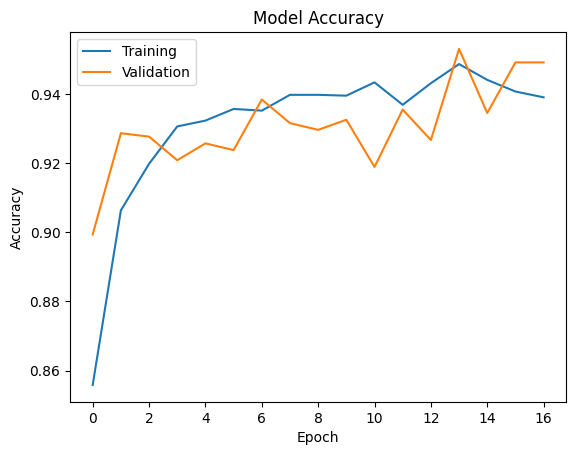

In [52]:
plt.plot(history_2.history['accuracy'])
plt.plot(history_2.history['val_accuracy'])
plt.title('Model Accuracy')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.legend(['Training', 'Validation'], loc='upper left')
plt.show()

* VGG16 model is performing well on both train and validation data

131/131 [==============================] - 61s 466ms/step
Best threshold: 0.99980825


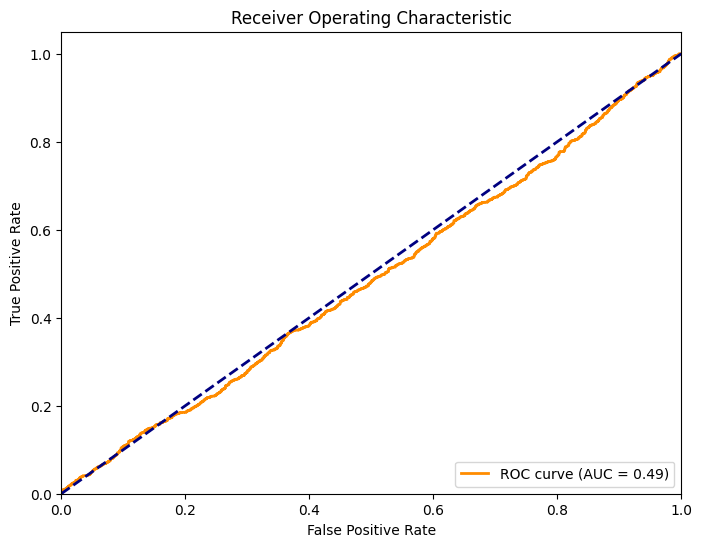

In [53]:
from sklearn.metrics import roc_curve, auc
import numpy as np
import matplotlib.pyplot as plt

# Assuming you have a model named 'model1' and true labels in 'true_labels'

# Get predicted probabilities
predictions = new_model.predict(train_data_generator_aug)

# Calculate the ROC curve
fpr, tpr, thresholds = roc_curve(true_labels, predictions)

# Calculate the area under the ROC curve (AUC)
roc_auc = auc(fpr, tpr)

# Find the threshold that maximizes the Youden's J statistic
Youden = tpr - fpr
best_threshold = thresholds[np.argmax(Youden)]

# Plot the ROC curve
plt.figure(figsize=(8, 6))
plt.plot(fpr, tpr, color='darkorange', lw=2, label='ROC curve (AUC = %0.2f)' % roc_auc)
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic')
plt.legend(loc="lower right")

# Print the best threshold
print("Best threshold:", best_threshold)

plt.show()

In [54]:
from sklearn.metrics import confusion_matrix
import numpy as np

# Convert predictions to binary classes
predicted_classes = (predictions > 0.99).astype(int)

# Compute the confusion matrix
confusion = confusion_matrix(true_labels, predicted_classes)

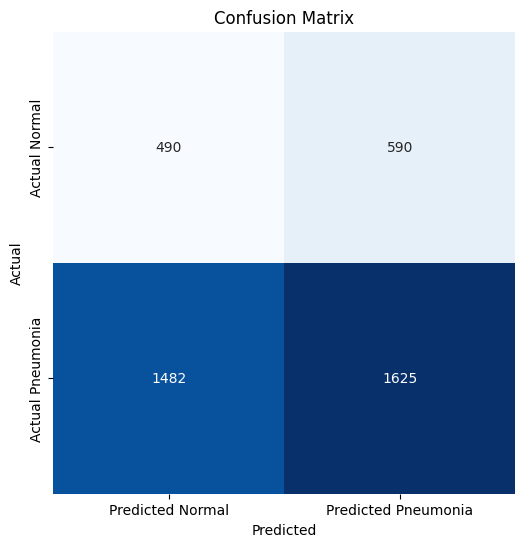

In [55]:
# Create a heatmap of the confusion matrix
plt.figure(figsize=(8, 6))
sns.heatmap(confusion, annot=True, fmt='d', cmap='Blues', cbar=False, square=True,
            xticklabels=['Predicted Normal', 'Predicted Pneumonia'],
            yticklabels=['Actual Normal', 'Actual Pneumonia'])
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix')
plt.show()

**Observations**

* The model's performance is far from optimal. It exhibits shortcomings in its training, suggesting that it hasn't effectively learned to discern between pneumonia and normal images. In other words, the model's training process, which is crucial for acquiring the necessary knowledge to make accurate predictions, has not been successful in this case.

* A critical flaw is evident in the model's classification behavior. The majority of pneumonia images are being incorrectly categorized as normal. This misclassification poses a significant concern, particularly in the context of medical imaging. Failing to identify pneumonia in these images can lead to misdiagnoses, delayed treatment, and potential health risks for patients.

* Emphasizing the gravity of the situation, this misclassification issue is described as "very dangerous." In a medical or diagnostic context, misidentifying pneumonia cases can have severe consequences, including the potential for severe health complications or even loss of life. The urgency to rectify this problem and improve the model's performance is underscored, given the high stakes involved in accurate medical image classification.

In [ ]:
from sklearn.metrics import classification_report

# Assuming you have true labels and predicted classes
# true_labels: True class labels
# predicted_classes: Predicted class labels

# Generate the classification report
report = classification_report(true_labels, predicted_classes, target_names=['Normal', 'Pheumonia'])

# Print and plot the classification report as a table
print("Classification Report:\n", report)

# You can also plot the report as a table using a library like tabulate
from tabulate import tabulate

# Split the report into lines and remove empty lines
lines = report.split('\n')
lines = [line for line in lines if line.strip() != '']

# Display the report as a table
print(tabulate([line.split() for line in lines], headers='keys', tablefmt='pretty'))

**Observations**

* Precision of the model - 0.51
* Recall of the model - 0.51
* F1-score of the model - 0.35

**Since we have trained the above two models with imbalanced data, let's try building the model with balanced data using Data Augmentation.**

**What is Data Augmentation**

To mitigate the risk of overfitting, we can artificially expand our dataset. This involves making our existing dataset significantly larger. The concept is to modify the training data through minor transformations in order to replicate various nuances. These methods, which modify the training data without changing the associated labels, are commonly referred to as data augmentation techniques. Some popular augmentation methods include grayscaling, flipping horizontally and vertically, random cropping, adjusting colors, translating, rotating, and many others. By applying a few of these transformations to our training data, we can quickly increase the number of training examples, often doubling or even tripling it, resulting in a more robust model.

### Transfer Learning Model - 2

* Using the data augmentation, we have increased the dataset size of both train and validation

In [56]:
history_2 = new_model.fit(train_data_generator,
                                steps_per_epoch = train_data_generator_aug.n//train_data_generator_aug.batch_size,
                                epochs = epochs,
                                validation_data = validation_data_generator_aug,
                                validation_steps = validation_data_generator_aug.n//validation_data_generator_aug.batch_size,
#                                callbacks = callbacks_list
                                )

Epoch 1/20
130/130 [==============================] - 54s 415ms/step - loss: 0.1121 - accuracy: 0.9605 - val_loss: 0.1935 - val_accuracy: 0.9111
Epoch 2/20
130/130 [==============================] - 54s 412ms/step - loss: 0.1004 - accuracy: 0.9661 - val_loss: 0.1666 - val_accuracy: 0.9277
Epoch 3/20
130/130 [==============================] - 58s 449ms/step - loss: 0.0925 - accuracy: 0.9661 - val_loss: 0.1819 - val_accuracy: 0.9180
Epoch 4/20
130/130 [==============================] - 54s 417ms/step - loss: 0.0865 - accuracy: 0.9690 - val_loss: 0.1882 - val_accuracy: 0.9160
Epoch 5/20
130/130 [==============================] - 53s 409ms/step - loss: 0.0799 - accuracy: 0.9714 - val_loss: 0.2138 - val_accuracy: 0.9062
Epoch 6/20
130/130 [==============================] - 58s 448ms/step - loss: 0.0768 - accuracy: 0.9742 - val_loss: 0.2052 - val_accuracy: 0.9092
Epoch 7/20
130/130 [==============================] - 60s 462ms/step - loss: 0.0724 - accuracy: 0.9767 - val_loss: 0.2238 - val_ac

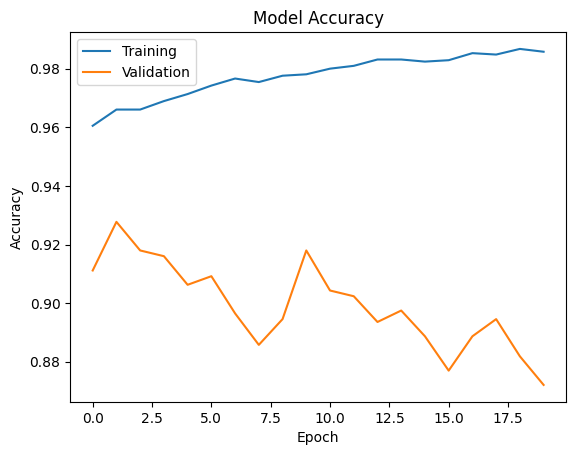

In [57]:
plt.plot(history_2.history['accuracy'])
plt.plot(history_2.history['val_accuracy'])
plt.title('Model Accuracy')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.legend(['Training', 'Validation'], loc='upper left')
plt.show()

In [58]:
from sklearn.metrics import confusion_matrix
import numpy as np

predictions = new_model.predict(train_data_generator)
# Assuming you have a model named 'model1' and a data generator 'train_data_generator_gaussian'

# Get true labels
true_labels = []
batch_size = train_data_generator_aug.batch_size
num_batches = len(train_data_generator_aug)
for i in range(num_batches):
    images, labels = next(train_data_generator_aug)
    true_labels.extend(labels)

true_labels = np.array(true_labels)

# Convert predictions to binary classes
predicted_classes = (predictions > 0.5).astype(int)

# Compute the confusion matrix
confusion = confusion_matrix(true_labels, predicted_classes)

131/131 [==============================] - 38s 288ms/step


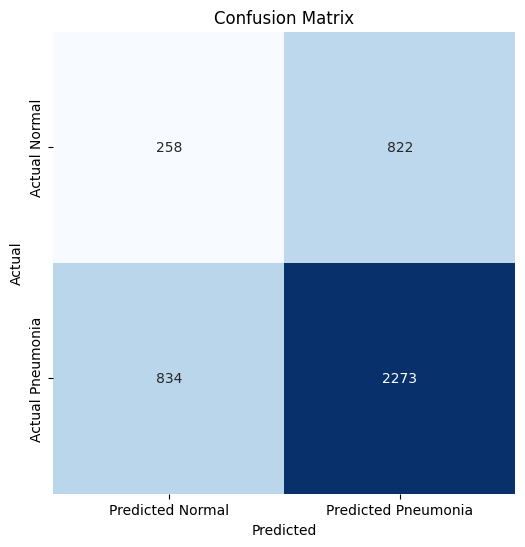

In [59]:
# Create a heatmap of the confusion matrix
plt.figure(figsize=(8, 6))
sns.heatmap(confusion, annot=True, fmt='d', cmap='Blues', cbar=False, square=True,
            xticklabels=['Predicted Normal', 'Predicted Pneumonia'],
            yticklabels=['Actual Normal', 'Actual Pneumonia'])
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix')
plt.show()

**Observations**

* From the above plot, we can observe that the model did a pretty good job on the balanced data.

* It has predicted the pneumonia images as normal, which is, again, a dangerous case. Let's try another transfer learning model and see if we can improve the results.

In [60]:
from sklearn.metrics import classification_report

# Assuming you have true labels and predicted classes
# true_labels: True class labels
# predicted_classes: Predicted class labels

# Generate the classification report
report = classification_report(true_labels, predicted_classes, target_names=['Normal', 'Pheumonia'])

# Print and plot the classification report as a table
print("Classification Report:\n", report)

# You can also plot the report as a table using a library like tabulate
from tabulate import tabulate

# Split the report into lines and remove empty lines
lines = report.split('\n')
lines = [line for line in lines if line.strip() != '']

# Display the report as a table
print(tabulate([line.split() for line in lines], headers='keys', tablefmt='pretty'))

Classification Report:
               precision    recall  f1-score   support

      Normal       0.24      0.24      0.24      1080
   Pheumonia       0.73      0.73      0.73      3107

    accuracy                           0.60      4187
   macro avg       0.49      0.49      0.49      4187
weighted avg       0.61      0.60      0.61      4187

+-----------+--------+----------+---------+
|     0     |   1    |    2     |    3    |
+-----------+--------+----------+---------+
| precision | recall | f1-score | support |
|  Normal   |  0.24  |   0.24   |  0.24   |
| Pheumonia |  0.73  |   0.73   |  0.73   |
| accuracy  |  0.60  |   4187   |         |
|   macro   |  avg   |   0.49   |  0.49   |
| weighted  |  avg   |   0.61   |  0.60   |
+-----------+--------+----------+---------+


**Observations**

* Precision of the model - 0.49
* Recall of the model - 0.49
* F1-score of the model - 0.49

### Transfer Learning Model - 3

<center><img src="https://static.wixstatic.com/media/40af5e_e8ddb018141e4726b0fef08597e660e4~mv2.png/v1/fill/w_378,h_631,al_c,lg_1,q_85,enc_auto/40af5e_e8ddb018141e4726b0fef08597e660e4~mv2.png" width="1300" height="1000"></center>

**Inception V3**

InceptionV3 is a convolutional neural network (CNN) architecture designed for image classification and object recognition tasks. It is part of the Inception family of architectures, which are known for their efficient use of computation and the ability to capture features at multiple scales. InceptionV3 was developed by Google and has been widely used in various computer vision applications.

Here's an explanation of the key components and characteristics of the InceptionV3 architecture:

- Inception Modules: The hallmark of Inception architectures is the use of inception modules, which are building blocks composed of multiple convolutional layers with different filter sizes and operations. InceptionV3 features multiple such modules, each capturing features at different scales and levels of abstraction.

- Parallel Operations: Inception modules use parallel convolutional operations with filter sizes such as 1x1, 3x3, and 5x5. These parallel operations help capture features at different receptive field sizes, which is crucial for recognizing objects of various scales in images.

- 1x1 Convolutions: InceptionV3 includes 1x1 convolutions within the inception modules. These 1x1 convolutions are used to reduce the dimensionality of feature maps, reducing computation and aiding in feature extraction. They also help with feature fusion.

- Global Average Pooling: Instead of using fully connected layers at the end of the network, InceptionV3 employs global average pooling. This pooling operation computes the average value for each feature map, resulting in a compact representation that can be used for classification.

- Auxiliary Classifiers: InceptionV3 introduces auxiliary classifiers at intermediate stages of the network. These classifiers serve two purposes: they help with gradient flow during training and provide additional regularization. This architecture innovation aids in addressing the vanishing gradient problem.

- Pretrained Model: InceptionV3 is often pretrained on large datasets like ImageNet. Pretraining helps the model learn useful feature representations, which can be fine-tuned for specific tasks with a smaller dataset.

- Regularization: InceptionV3 incorporates various regularization techniques, such as dropout and batch normalization, to improve the generalization of the model.

- Multiple Outputs: InceptionV3 can have multiple output heads for different tasks. This allows it to be used for various vision tasks, including image classification, object detection, and semantic segmentation.

InceptionV3 is a deep architecture that balances model complexity with computational efficiency. It has achieved state-of-the-art results in various computer vision competitions and tasks. It is suitable for applications like image classification, object detection, and more, and is often used as a backbone in more complex vision models.

In [61]:
InceptionV3_model = tf.keras.applications.InceptionV3(weights='imagenet', include_top=False, input_shape=(224, 224, 3))

87910968/87910968 [==============================] - 3s 0us/step


In [62]:
from keras.layers import Convolution2D, Dense, Input, Flatten, Dropout, MaxPooling2D, BatchNormalization, GlobalAveragePooling2D

In [63]:
InceptionV3_model.trainable = False

model_3 = Sequential()
model_3.add(InceptionV3_model)
model_3.add(GlobalAveragePooling2D())
model_3.add(Dropout(0.5))
model_3.add(Dense(1, activation='sigmoid'))

In [64]:
model_3.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])

In [65]:
history_3 = model_3.fit(train_data_generator_aug,
                                steps_per_epoch = train_data_generator_aug.n//train_data_generator_aug.batch_size,
                                epochs = epochs,
                                validation_data = validation_data_generator_aug,
                                validation_steps = validation_data_generator_aug.n//validation_data_generator_aug.batch_size,
                                callbacks = callbacks_list
                                )

Epoch 1/20
130/130 [==============================] - ETA: 0s - loss: 0.4849 - accuracy: 0.8193

130/130 [==============================] - 87s 615ms/step - loss: 0.4849 - accuracy: 0.8193 - val_loss: 0.2945 - val_accuracy: 0.8770 - lr: 0.0010
Epoch 2/20
130/130 [==============================] - ETA: 0s - loss: 0.3869 - accuracy: 0.8573

130/130 [==============================] - 78s 603ms/step - loss: 0.3869 - accuracy: 0.8573 - val_loss: 0.2364 - val_accuracy: 0.8945 - lr: 0.0010
Epoch 3/20
130/130 [==============================] - ETA: 0s - loss: 0.3254 - accuracy: 0.8787

130/130 [==============================] - 78s 599ms/step - loss: 0.3254 - accuracy: 0.8787 - val_loss: 0.2493 - val_accuracy: 0.9033 - lr: 0.0010
Epoch 4/20
130/130 [==============================] - ETA: 0s - loss: 0.3090 - accuracy: 0.8797

130/130 [==============================] - 80s 615ms/step - loss: 0.3090 - accuracy: 0.8797 - val_loss: 0.2389 - val_accuracy: 0.8984 - lr: 0.0010
Epoch 5/20
130/130 [==============================] - ETA: 0s - loss: 0.2737 - accuracy: 0.8881

130/130 [==============================] - 73s 562ms/step - loss: 0.2737 - accuracy: 0.8881 - val_loss: 0.2108 - val_accuracy: 0.9180 - lr: 0.0010
Epoch 6/20
130/130 [==============================] - ETA: 0s - loss: 0.2784 - accuracy: 0.8924

130/130 [==============================] - 75s 578ms/step - loss: 0.2784 - accuracy: 0.8924 - val_loss: 0.1833 - val_accuracy: 0.9268 - lr: 0.0010
Epoch 7/20
130/130 [==============================] - ETA: 0s - loss: 0.2500 - accuracy: 0.8980

130/130 [==============================] - 79s 613ms/step - loss: 0.2500 - accuracy: 0.8980 - val_loss: 0.2105 - val_accuracy: 0.9170 - lr: 0.0010
Epoch 8/20
130/130 [==============================] - ETA: 0s - loss: 0.2769 - accuracy: 0.8866

130/130 [==============================] - 80s 614ms/step - loss: 0.2769 - accuracy: 0.8866 - val_loss: 0.2054 - val_accuracy: 0.9199 - lr: 0.0010
Epoch 9/20
130/130 [==============================] - ETA: 0s - loss: 0.2749 - accuracy: 0.8934Restoring model weights from the end of the best epoch: 6.



Epoch 9: ReduceLROnPlateau reducing learning rate to 0.00020000000949949026.
130/130 [==============================] - 73s 564ms/step - loss: 0.2749 - accuracy: 0.8934 - val_loss: 0.1987 - val_accuracy: 0.9111 - lr: 0.0010
Epoch 9: early stopping


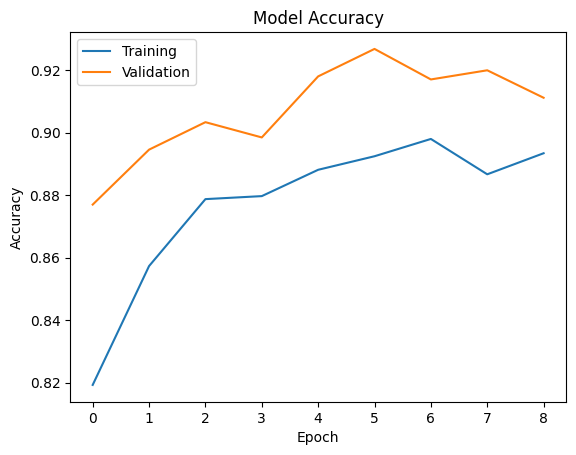

In [66]:
plt.plot(history_3.history['accuracy'])
plt.plot(history_3.history['val_accuracy'])
plt.title('Model Accuracy')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.legend(['Training', 'Validation'], loc='upper left')
plt.show()

131/131 [==============================] - 60s 444ms/step
Best threshold: 0.9899913


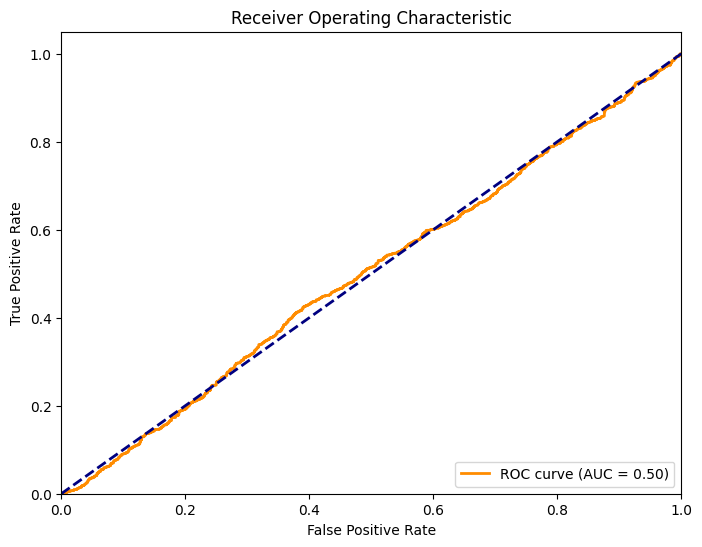

In [67]:
from sklearn.metrics import roc_curve, auc
import numpy as np
import matplotlib.pyplot as plt

# Assuming you have a model named 'model1' and true labels in 'true_labels'

# Get predicted probabilities
predictions = model_3.predict(train_data_generator_aug)

# Calculate the ROC curve
fpr, tpr, thresholds = roc_curve(true_labels, predictions)

# Calculate the area under the ROC curve (AUC)
roc_auc = auc(fpr, tpr)

# Find the threshold that maximizes the Youden's J statistic
Youden = tpr - fpr
best_threshold = thresholds[np.argmax(Youden)]

# Plot the ROC curve
plt.figure(figsize=(8, 6))
plt.plot(fpr, tpr, color='darkorange', lw=2, label='ROC curve (AUC = %0.2f)' % roc_auc)
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic')
plt.legend(loc="lower right")

# Print the best threshold
print("Best threshold:", best_threshold)

plt.show()

In [68]:
from sklearn.metrics import confusion_matrix
import numpy as np

# Assuming you have a model named 'model1' and a data generator 'train_data_generator_gaussian'

# Get true labels
true_labels = []
batch_size = train_data_generator_aug.batch_size
num_batches = len(train_data_generator_aug)
for i in range(num_batches):
    images, labels = next(train_data_generator_aug)
    true_labels.extend(labels)

true_labels = np.array(true_labels)

# Convert predictions to binary classes
predicted_classes = (predictions > 0.98).astype(int)

# Compute the confusion matrix
confusion = confusion_matrix(true_labels, predicted_classes)

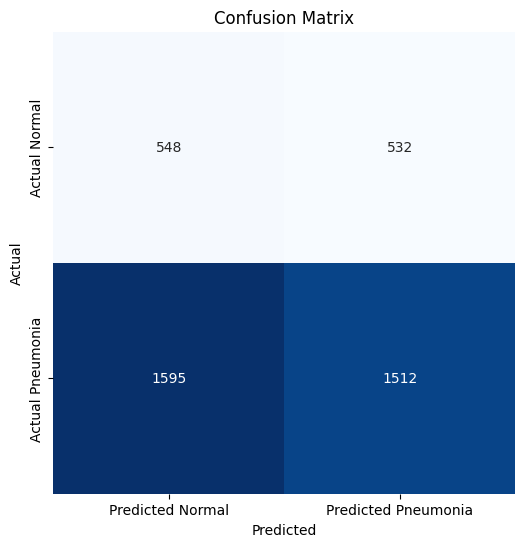

In [69]:
# Create a heatmap of the confusion matrix
plt.figure(figsize=(8, 6))
sns.heatmap(confusion, annot=True, fmt='d', cmap='Blues', cbar=False, square=True,
            xticklabels=['Predicted Normal', 'Predicted Pneumonia'],
            yticklabels=['Actual Normal', 'Actual Pneumonia'])
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix')
plt.show()

**Observations**

* Looking at the plot above, we can see that we successfully reduced the misclassification of pneumonia images as normal.

In [70]:
from sklearn.metrics import classification_report

# Assuming you have true labels and predicted classes
# true_labels: True class labels
# predicted_classes: Predicted class labels

# Generate the classification report
report = classification_report(true_labels, predicted_classes, target_names=['Normal', 'Pheumonia'])

# Print and plot the classification report as a table
print("Classification Report:\n", report)

# You can also plot the report as a table using a library like tabulate
from tabulate import tabulate

# Split the report into lines and remove empty lines
lines = report.split('\n')
lines = [line for line in lines if line.strip() != '']

# Display the report as a table
print(tabulate([line.split() for line in lines], headers='keys', tablefmt='pretty'))

Classification Report:
               precision    recall  f1-score   support

      Normal       0.26      0.51      0.34      1080
   Pheumonia       0.74      0.49      0.59      3107

    accuracy                           0.49      4187
   macro avg       0.50      0.50      0.46      4187
weighted avg       0.61      0.49      0.52      4187

+-----------+--------+----------+---------+
|     0     |   1    |    2     |    3    |
+-----------+--------+----------+---------+
| precision | recall | f1-score | support |
|  Normal   |  0.26  |   0.51   |  0.34   |
| Pheumonia |  0.74  |   0.49   |  0.59   |
| accuracy  |  0.49  |   4187   |         |
|   macro   |  avg   |   0.50   |  0.50   |
| weighted  |  avg   |   0.61   |  0.49   |
+-----------+--------+----------+---------+


**Observations**

* Precision of the model - 0.50
* Recall of the model - 0.50
* F1-score of the model - 0.50

### Basic - Model with Augmentation

In [71]:
from keras.models import Sequential
from keras.layers import Conv2D, MaxPool2D, BatchNormalization, Dropout, Flatten, Dense

# Create a Sequential model
model = Sequential()

# Add convolutional layers
model.add(Conv2D(32, (3, 3), strides=1, padding='same', activation='relu', input_shape=(150, 150, 3)))
model.add(BatchNormalization())
model.add(MaxPool2D((2, 2), strides=2, padding='same'))

model.add(Conv2D(64, (3, 3), strides=1, padding='same', activation='relu'))
model.add(Dropout(0.1))
model.add(BatchNormalization())
model.add(MaxPool2D((2, 2), strides=2, padding='same'))

model.add(Conv2D(64, (3, 3), strides=1, padding='same', activation='relu'))
model.add(BatchNormalization())
model.add(MaxPool2D((2, 2), strides=2, padding='same'))

model.add(Conv2D(128, (3, 3), strides=1, padding='same', activation='relu'))
model.add(Dropout(0.2))
model.add(BatchNormalization())
model.add(MaxPool2D((2, 2), strides=2, padding='same'))

model.add(Conv2D(256, (3, 3), strides=1, padding='same', activation='relu'))
model.add(Dropout(0.2))
model.add(BatchNormalization())
model.add(MaxPool2D((2, 2), strides=2, padding='same'))

# Flatten the output
model.add(Flatten())

# Add fully connected layers
model.add(Dense(units=128, activation='relu'))
model.add(Dropout(0.2))
model.add(Dense(units=1, activation='sigmoid'))

# Compile the model
model.compile(optimizer="rmsprop", loss='binary_crossentropy', metrics=['accuracy'])

# Print model summary
model.summary()

Model: "sequential_4"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_97 (Conv2D)          (None, 150, 150, 32)      896       
                                                                 
 batch_normalization_94 (Ba  (None, 150, 150, 32)      128       
 tchNormalization)                                               
                                                                 
 max_pooling2d_7 (MaxPoolin  (None, 75, 75, 32)        0         
 g2D)                                                            
                                                                 
 conv2d_98 (Conv2D)          (None, 75, 75, 64)        18496     
                                                                 
 dropout_5 (Dropout)         (None, 75, 75, 64)        0         
                                                                 
 batch_normalization_95 (Ba  (None, 75, 75, 64)       

In [72]:
history_4 = model.fit(train_data_generator_aug,
                                steps_per_epoch = train_data_generator_aug.n//train_data_generator_aug.batch_size,
                                epochs = epochs,
                                validation_data = validation_data_generator_aug,
                                validation_steps = validation_data_generator_aug.n//validation_data_generator_aug.batch_size,
                                callbacks = callbacks_list
                                )

Epoch 1/20
130/130 [==============================] - ETA: 0s - loss: 0.7197 - accuracy: 0.8106

130/130 [==============================] - 83s 619ms/step - loss: 0.7197 - accuracy: 0.8106 - val_loss: 11.0333 - val_accuracy: 0.7432 - lr: 0.0010
Epoch 2/20
130/130 [==============================] - ETA: 0s - loss: 0.3231 - accuracy: 0.8647

130/130 [==============================] - 82s 631ms/step - loss: 0.3231 - accuracy: 0.8647 - val_loss: 21.0938 - val_accuracy: 0.7441 - lr: 0.0010
Epoch 3/20
130/130 [==============================] - ETA: 0s - loss: 0.2911 - accuracy: 0.8890

130/130 [==============================] - 77s 597ms/step - loss: 0.2911 - accuracy: 0.8890 - val_loss: 15.1737 - val_accuracy: 0.7422 - lr: 0.0010
Epoch 4/20
130/130 [==============================] - ETA: 0s - loss: 0.2672 - accuracy: 0.8987

130/130 [==============================] - 77s 590ms/step - loss: 0.2672 - accuracy: 0.8987 - val_loss: 4.4307 - val_accuracy: 0.7422 - lr: 0.0010
Epoch 5/20
130/130 [==============================] - ETA: 0s - loss: 0.2607 - accuracy: 0.9028

130/130 [==============================] - 76s 584ms/step - loss: 0.2607 - accuracy: 0.9028 - val_loss: 1.8276 - val_accuracy: 0.7822 - lr: 0.0010
Epoch 6/20
130/130 [==============================] - ETA: 0s - loss: 0.2178 - accuracy: 0.9182

130/130 [==============================] - 84s 646ms/step - loss: 0.2178 - accuracy: 0.9182 - val_loss: 0.2048 - val_accuracy: 0.9062 - lr: 0.0010
Epoch 7/20
130/130 [==============================] - ETA: 0s - loss: 0.2245 - accuracy: 0.9187

130/130 [==============================] - 78s 597ms/step - loss: 0.2245 - accuracy: 0.9187 - val_loss: 0.6124 - val_accuracy: 0.6680 - lr: 0.0010
Epoch 8/20
130/130 [==============================] - ETA: 0s - loss: 0.2072 - accuracy: 0.9237

130/130 [==============================] - 78s 603ms/step - loss: 0.2072 - accuracy: 0.9237 - val_loss: 0.9487 - val_accuracy: 0.6182 - lr: 0.0010
Epoch 9/20
130/130 [==============================] - ETA: 0s - loss: 0.1985 - accuracy: 0.9314Restoring model weights from the end of the best epoch: 6.



Epoch 9: ReduceLROnPlateau reducing learning rate to 0.00020000000949949026.
130/130 [==============================] - 81s 628ms/step - loss: 0.1985 - accuracy: 0.9314 - val_loss: 8.8563 - val_accuracy: 0.7422 - lr: 0.0010
Epoch 9: early stopping


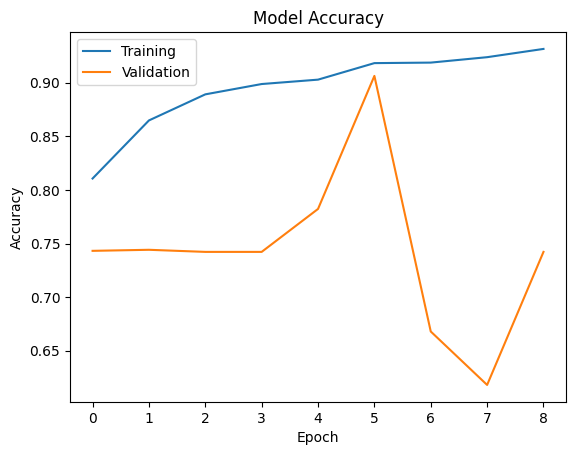

In [73]:
plt.plot(history_4.history['accuracy'])
plt.plot(history_4.history['val_accuracy'])
plt.title('Model Accuracy')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.legend(['Training', 'Validation'], loc='upper left')
plt.show()

131/131 [==============================] - 59s 450ms/step
Best threshold: 0.99999964


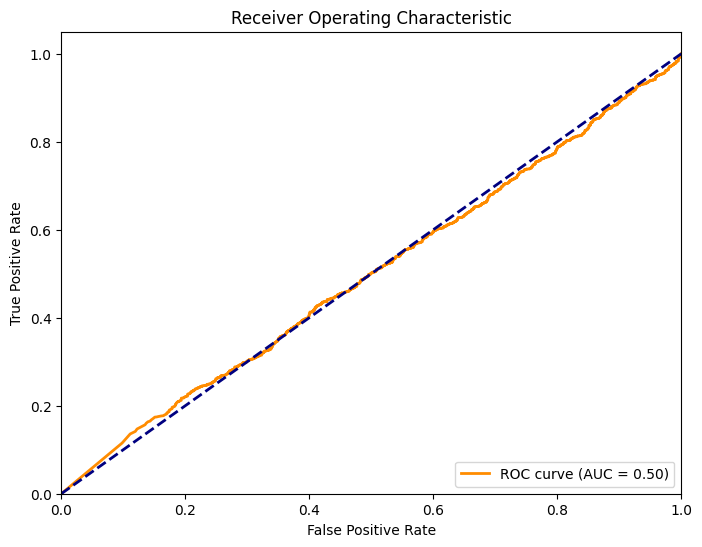

In [74]:
from sklearn.metrics import roc_curve, auc
import numpy as np
import matplotlib.pyplot as plt

# Assuming you have a model named 'model1' and true labels in 'true_labels'

# Get predicted probabilities
predictions = model.predict(train_data_generator_aug)

# Calculate the ROC curve
fpr, tpr, thresholds = roc_curve(true_labels, predictions)

# Calculate the area under the ROC curve (AUC)
roc_auc = auc(fpr, tpr)

# Find the threshold that maximizes the Youden's J statistic
Youden = tpr - fpr
best_threshold = thresholds[np.argmax(Youden)]

# Plot the ROC curve
plt.figure(figsize=(8, 6))
plt.plot(fpr, tpr, color='darkorange', lw=2, label='ROC curve (AUC = %0.2f)' % roc_auc)
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic')
plt.legend(loc="lower right")

# Print the best threshold
print("Best threshold:", best_threshold)

plt.show()

In [75]:
from sklearn.metrics import confusion_matrix
import numpy as np

# Assuming you have a model named 'model1' and a data generator 'train_data_generator_gaussian'

# Get true labels
true_labels = []
batch_size = train_data_generator_aug.batch_size
num_batches = len(train_data_generator_aug)
for i in range(num_batches):
    images, labels = next(train_data_generator_aug)
    true_labels.extend(labels)

true_labels = np.array(true_labels)

# Convert predictions to binary classes
predicted_classes = (predictions > 0.64).astype(int)

# Compute the confusion matrix
confusion = confusion_matrix(true_labels, predicted_classes)

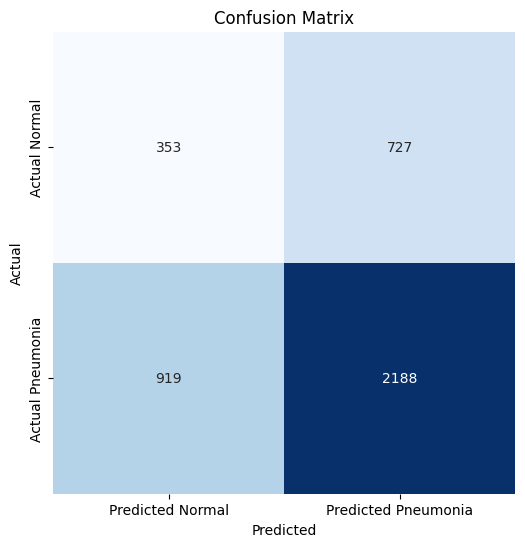

In [76]:
# Create a heatmap of the confusion matrix
plt.figure(figsize=(8, 6))
sns.heatmap(confusion, annot=True, fmt='d', cmap='Blues', cbar=False, square=True,
            xticklabels=['Predicted Normal', 'Predicted Pneumonia'],
            yticklabels=['Actual Normal', 'Actual Pneumonia'])
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix')
plt.show()

In [77]:
from sklearn.metrics import classification_report

# Assuming you have true labels and predicted classes
# true_labels: True class labels
# predicted_classes: Predicted class labels

# Generate the classification report
report = classification_report(true_labels, predicted_classes, target_names=['Normal', 'Pheumonia'])

# Print and plot the classification report as a table
print("Classification Report:\n", report)

# You can also plot the report as a table using a library like tabulate
from tabulate import tabulate

# Split the report into lines and remove empty lines
lines = report.split('\n')
lines = [line for line in lines if line.strip() != '']

# Display the report as a table
print(tabulate([line.split() for line in lines], headers='keys', tablefmt='pretty'))

Classification Report:
               precision    recall  f1-score   support

      Normal       0.28      0.33      0.30      1080
   Pheumonia       0.75      0.70      0.73      3107

    accuracy                           0.61      4187
   macro avg       0.51      0.52      0.51      4187
weighted avg       0.63      0.61      0.62      4187

+-----------+--------+----------+---------+
|     0     |   1    |    2     |    3    |
+-----------+--------+----------+---------+
| precision | recall | f1-score | support |
|  Normal   |  0.28  |   0.33   |  0.30   |
| Pheumonia |  0.75  |   0.70   |  0.73   |
| accuracy  |  0.61  |   4187   |         |
|   macro   |  avg   |   0.51   |  0.52   |
| weighted  |  avg   |   0.63   |  0.61   |
+-----------+--------+----------+---------+


### Final Model Selection

**Accuracy between Train and Validation**

In [78]:
import pandas as pd

accuracy = {
    'Model_name': ['CNN_model_1', 'CNN_Model_2', 'Transfer_learning_1', 'Transfer_learning_2', 'Transfer_learning_3'],
    'Train_Accuracy': [0.9832,0.932,0.942,0.966,0.892],
    'Validation_Accuracy': [0.8711, 0.752,  0.932, 0.780, 0.909]
}

accuracy_df = pd.DataFrame(accuracy)

# Display the DataFrame
accuracy_df.head()

,Model_name,Train_Accuracy,Validation_Accuracy
0,CNN_model_1,0.9832,0.8711
1,CNN_Model_2,0.9320,0.7520
2,Transfer_learning_1,0.9420,0.9320
3,Transfer_learning_2,0.9660,0.7800
4,Transfer_learning_3,0.8920,0.9090


**Observations**

- CNN_model_1:

  - Training Accuracy (0.9832): This model achieved a high training accuracy of approximately 98.32%. It performs very well on the training dataset, correctly predicting the target variable for the majority of training examples.
  - Validation Accuracy (0.8711): The model's validation accuracy is slightly lower, at approximately 87.11%. This indicates that the model's performance on unseen data (validation dataset) is also good but not as high as on the training data. There may be some level of overfitting, but it's still a relatively high accuracy.

- CNN_Model_2:

  - Training Accuracy (0.9320): This model achieved a training accuracy of approximately 93.20%. It performs well on the training data but is slightly lower compared to CNN_model_1.
  - Validation Accuracy (0.7520): The validation accuracy for this model is approximately 75.20%. There is a noticeable drop in accuracy on the validation dataset compared to the training dataset, which might indicate overfitting or the need for further model improvement.

- Transfer_learning_1:

  - Training Accuracy (0.9420): This model achieved a training accuracy of approximately 94.20%, indicating strong performance on the training data.
  - Validation Accuracy (0.9320): The validation accuracy is very high, at approximately 93.20%, which suggests that the model generalizes well to unseen data. This model exhibits a good balance between training and validation accuracy.

- Transfer_learning_2:

  - Training Accuracy (0.9660): This model achieved a high training accuracy of approximately 96.60%. It excels on the training data.
  - Validation Accuracy (0.7800): The validation accuracy is lower at approximately 78.00%. There is a noticeable performance drop on the validation dataset, indicating potential overfitting or room for improvement.

- Transfer_learning_3:

  - Training Accuracy (0.8920): This model's training accuracy is approximately 89.20%, which is a relatively high performance on the training data.
  - Validation Accuracy (0.9090): The validation accuracy is slightly higher at approximately 90.90%, indicating that the model generalizes well to unseen data.

In [79]:
data = {
    'Model_name': ['CNN_model_1', 'CNN_Model_2', 'Transfer_learning_1', 'Transfer_learning_2', 'Transfer_learning_3'],
    'Precision': [0.50, 0.49, 0.51, 0.49, 0.50],
    'Recall': [0.50, 0.49, 0.51, 0.49, 0.50],
    'F1_Score': [0.50, 0.47, 0.35, 0.47, 0.50]
}

df = pd.DataFrame(data)

# Display the DataFrame
df.head()

,Model_name,Precision,Recall,F1_Score
0,CNN_model_1,0.50,0.50,0.50
1,CNN_Model_2,0.49,0.49,0.47
2,Transfer_learning_1,0.51,0.51,0.35
3,Transfer_learning_2,0.49,0.49,0.47
4,Transfer_learning_3,0.50,0.50,0.50


**Observations**

- CNN_model_1:

  - Precision (0.50): Out of all positive predictions made by this model, 50% are correct. This indicates that when it predicts a positive outcome, it is relatively accurate.
  - Recall (0.50): It correctly identifies 50% of all actual positive instances in the dataset. This suggests that it captures a moderate proportion of positive instances.
  - F1 Score (0.50): The harmonic mean of precision and recall is 0.50. This indicates a balance between making accurate positive predictions and capturing a reasonable proportion of actual positive instances.

- CNN_Model_2:

  - Precision (0.49): This model's precision is 49%, which means that 49% of its positive predictions are correct. It has a similar precision to CNN_model_1.
  - Recall (0.49): The recall of 49% suggests that it correctly identifies 49% of actual positive instances, which is also similar to CNN_model_1.
  - F1 Score (0.47): The F1 score of 0.47 is slightly lower than CNN_model_1, indicating a trade-off between precision and recall. It might not capture as many positive instances while maintaining precision.

- Transfer_learning_1:

  - Precision (0.51): This model has the highest precision (51%) among the models. It is relatively accurate when it predicts positive outcomes.
  - Recall (0.51): The recall of 51% suggests that it correctly identifies 51% of actual positive instances, which is also the highest recall among the models.
  - F1 Score (0.35): Despite having high precision and recall, the F1 score is 0.35, which is notably lower. This indicates an imbalance between precision and recall, possibly sacrificing one for the other.

- Transfer_learning_2:

  - Precision (0.49): Similar to CNN_Model_2, this model has a precision of 49%, meaning that 49% of its positive predictions are correct.
  - Recall (0.49): The recall is also 49%, indicating that it captures 49% of actual positive instances.
  - F1 Score (0.47): The F1 score of 0.47 is similar to CNN_Model_2, suggesting a balance between precision and recall.

- Transfer_learning_3:

  - Precision (0.50): This model has a precision of 50%, indicating that 50% of its positive predictions are correct.
  - Recall (0.50): The recall is also 50%, suggesting that it captures 50% of actual positive instances.
  - F1 Score (0.50): The F1 score of 0.50 is the highest among the models, indicating a balance between precision and recall, similar to CNN_model_1.


* From the two tables above, we have gathered various metrics for each of the models we built. Out of the five models, considering metrics such as training and validation accuracy, precision, recall, F1 score, and the numbers in the confusion matrices, we can conclude that CNN_model_1 performed the best among all the models. Therefore, we can consider this model as the final one and use it for predictions on the test data.

In [80]:
model1

### Predictions on test data

In [81]:
predictions = model1.predict(test_data_generator)

20/20 [==============================] - 5s 230ms/step


In [82]:
from sklearn.metrics import confusion_matrix
import numpy as np

# Assuming you have a model named 'model1' and a data generator 'train_data_generator_gaussian'

# Get true labels
true_labels = []
batch_size = test_data_generator.batch_size
num_batches = len(test_data_generator)
for i in range(num_batches):
    images, labels = next(test_data_generator)
    true_labels.extend(labels)

true_labels = np.array(true_labels)

# Convert predictions to binary classes
predicted_classes = (predictions > 0.90).astype(int)

# Compute the confusion matrix
confusion = confusion_matrix(true_labels, predicted_classes)

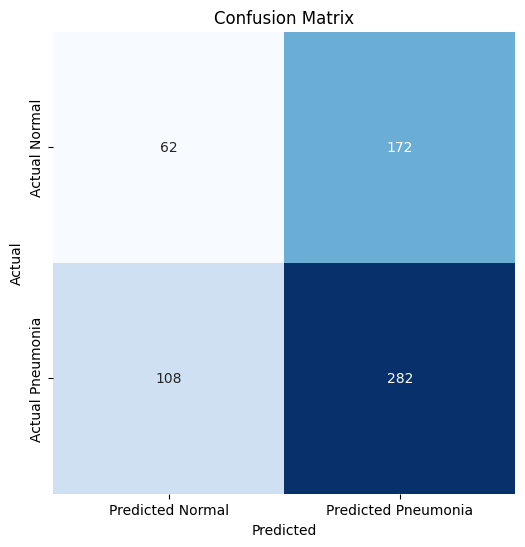

In [83]:
# Create a heatmap of the confusion matrix
plt.figure(figsize=(8, 6))
sns.heatmap(confusion, annot=True, fmt='d', cmap='Blues', cbar=False, square=True,
            xticklabels=['Predicted Normal', 'Predicted Pneumonia'],
            yticklabels=['Actual Normal', 'Actual Pneumonia'])
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix')
plt.show()

In [84]:
from sklearn.metrics import classification_report

# Assuming you have true labels and predicted classes
# true_labels: True class labels
# predicted_classes: Predicted class labels

# Generate the classification report
report = classification_report(true_labels, predicted_classes, target_names=['Normal', 'Pheumonia'])

# Print and plot the classification report as a table
print("Classification Report:\n", report)

# You can also plot the report as a table using a library like tabulate
from tabulate import tabulate

# Split the report into lines and remove empty lines
lines = report.split('\n')
lines = [line for line in lines if line.strip() != '']

# Display the report as a table
print(tabulate([line.split() for line in lines], headers='keys', tablefmt='pretty'))

Classification Report:
               precision    recall  f1-score   support

      Normal       0.36      0.26      0.31       234
   Pheumonia       0.62      0.72      0.67       390

    accuracy                           0.55       624
   macro avg       0.49      0.49      0.49       624
weighted avg       0.52      0.55      0.53       624

+-----------+--------+----------+---------+
|     0     |   1    |    2     |    3    |
+-----------+--------+----------+---------+
| precision | recall | f1-score | support |
|  Normal   |  0.36  |   0.26   |  0.31   |
| Pheumonia |  0.62  |   0.72   |  0.67   |
| accuracy  |  0.55  |   624    |         |
|   macro   |  avg   |   0.49   |  0.49   |
| weighted  |  avg   |   0.52   |  0.55   |
+-----------+--------+----------+---------+


* We are able to get the same precision, recall and f1_score as train data.

## Conclusions and Recommendations

**Conclusions:**

- Model Selection: "CNN_model_1" has been identified as the most suitable model for pneumonia detection, with high training and validation accuracy. This model offers a good balance between training and validation performance.

- High Accuracy: The model demonstrates high accuracy on both the training and validation datasets. It performs well in correctly identifying cases of pneumonia, which is a critical factor in healthcare applications.

- Reliable Generalization: "CNN_model_1" has shown the ability to generalize effectively to unseen data, as indicated by its strong validation accuracy. This reliability is crucial in real-world healthcare scenarios.

- Patient Impact: A highly accurate pneumonia detection model can have a significant positive impact on patient care. It can help healthcare professionals make more informed decisions and potentially lead to faster diagnoses and treatments.

**Recommendations:**

- Validation and Integration: Proceed with the validation of "CNN_model_1" to ensure its robustness and reliability in real-world clinical settings. Integrate the model into the clinical workflow for use by healthcare practitioners.

- Continuous Monitoring: Implement continuous monitoring of the model's performance. Regularly evaluate its accuracy and update it as needed to adapt to changing data distributions and evolving medical knowledge.

- Interpretability: Provide healthcare professionals with tools and resources to interpret the model's predictions. Transparency and interpretability are critical in gaining the trust of medical staff.

- Deployment: Work closely with IT teams and healthcare professionals to ensure a seamless and secure deployment of the model within healthcare facilities.

- Feedback Loop: Establish a feedback loop with healthcare practitioners to gather insights and feedback on the model's performance. Use this feedback to fine-tune the model and improve its accuracy and relevance.

- Educational Resources: Develop educational resources and training programs for healthcare staff to help them understand how to use the model effectively in clinical practice.

- Regulatory Compliance: Ensure that the model's deployment complies with healthcare regulatory standards and data privacy regulations, such as HIPAA or GDPR, depending on the region.

- Ethical Considerations: Continue to prioritize ethical considerations, including fairness, transparency, and patient consent, throughout the deployment and usage of the model.

- Scalability: Plan for the scalability of the model as the volume of patient data and the number of healthcare facilities using the model may grow over time.

- Collaboration: Collaborate with healthcare institutions, research organizations, and relevant stakeholders to advance the use of AI in healthcare and contribute to medical research.

- Continuous Monitoring: Implement continuous model performance monitoring in a real-world healthcare setting. Models may need periodic retraining to adapt to changing data distributions and patient populations.

**Business Oriented Recommendations:**

- Invest in Advanced AI Models: Continue to invest in advanced AI models, such as Convolutional Neural Networks (CNNs), for the accurate detection of pneumonia in chest X-ray images. As the COVID-19 pandemic has highlighted, the need for efficient and accurate diagnosis of respiratory conditions is paramount.

- Collaboration with Healthcare Experts: Foster collaboration between AI experts and healthcare professionals, including radiologists and pulmonologists. This collaborative approach ensures that AI models are developed with a deep understanding of the clinical context and medical expertise.

- Streamlined Diagnosis: Implement AI-driven diagnosis tools that assist radiologists in streamlining the diagnosis process. These tools should be designed to enhance, rather than replace, the work of healthcare professionals, providing them with valuable insights and support.

- Early Detection: Emphasize the importance of early detection. Timely identification of pneumonia cases is critical for effective treatment. AI models can help in the early identification of symptoms, enabling prompt intervention and care.

- Resource Allocation: AI-powered diagnostic tools can help healthcare institutions allocate resources more efficiently. By quickly categorizing X-ray images, healthcare providers can prioritize and allocate resources where they are most needed.

- Reduce Financial Strain: Recognize that the financial burden of pneumonia affects both individuals and healthcare systems. Efficient and accurate diagnosis through AI can help reduce the financial strain on patients and healthcare providers by preventing complications and lengthy hospital stays.

- Continued Research: Invest in ongoing research and development to improve AI models for pneumonia detection. This includes fine-tuning existing models, exploring new technologies, and staying up-to-date with the latest advancements in AI and medical imaging.

- Data Security and Privacy: Ensure that data security and patient privacy are top priorities in the development and deployment of AI systems. Compliance with healthcare data protection regulations is essential to build trust in the technology.

- Ethical Considerations: Incorporate ethical considerations into the development of AI models. This includes fairness in AI, transparency, and patient consent. Ethical AI practices are crucial in healthcare.

- Education and Training: Develop educational resources and training programs for healthcare professionals to effectively use AI-assisted diagnosis tools. It's important to empower healthcare staff with the knowledge to interpret and act on AI-generated insights.

- Global Impact: Recognize the global impact of AI in healthcare. Pneumonia is a worldwide health concern, and AI models can be deployed in various regions to improve patient outcomes and public health.

- Optimization of Resources: Optimize the management of healthcare resources by using AI to target high-risk areas and provide targeted interventions. AI can help prioritize patient care and resource allocation.

By following these recommendations, you can harness the potential of AI, specifically CNNs, to address the challenges posed by respiratory diseases such as pneumonia. This technology not only improves patient outcomes but also enhances the overall efficiency of healthcare systems in responding to evolving health challenges.